In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.ticker as ticker


# path = "C:/Users/Juan Jose/OneDrive - Universidad Arturo Prat/Inteligencia de Negocios/EDA/FINAL.csv"
path = "kiwi.csv"

df = pd.read_csv(path, encoding="latin-1", memory_map=True, decimal=",", low_memory=False)

print(df.shape)

(804872, 59)


In [26]:
print(df.columns)

Index(['RegionProveedor', 'NroLicitacion', 'NombreLicitacion',
       'TipoLicitacion', 'Descripcion', 'MonedaLicitacion',
       'MontoEstimadoLicitacion', 'MontoEstimadoVisible', 'FechaPublicacion',
       'FechaInicioPreguntas', 'FechaFinalPreguntas',
       'FechaPublicacionRespuestas', 'FechaActoAperturaTecnica',
       'FechaActoAperturaEconomica', 'FechaCierre', 'FechaAdjudicacion',
       'UnidadTiempoEvaluacion', 'EstadoLicitacion', 'ContemplaObrasPublicas',
       'LicitacionInformada', 'TipoAdjudicacion', 'TipoAprobacionAdjudicacion',
       'NumeroActaAprobacion', 'FechaActaAprobacion', 'TipoConvocatoria',
       'NroEtapasLicitacion', 'SubContratacion', 'PublicidadOfertasTecnicas',
       'Contrato', 'TiempoDuracionContrato', 'UnidadTiempoDuracionContrato',
       'ValorTiempoRenovacion', 'TipoEjecucion', 'PlazoPagoContrato',
       'TipoPago', 'ExtensionPlazo', 'UnidadCompra', 'UnidadCompraRUT',
       'entCode', 'RubroN1', 'RubroN2', 'CodigoProductoONU', 'ONUProducto',
 

In [26]:
licitaciones = df.copy(deep=True).drop_duplicates(subset='NroLicitacion', keep='last')
print(licitaciones.shape)

#print null values
#print(licitaciones.isnull().sum())

(31145, 59)


In [3]:
# extract ProveedorRUT and RegionProveedor
# A ProveedorRUT can have multiple RegionProveedor, we want the most common one
df_temp = df.copy(deep=True)

# Define a function to get the mode or NaN if the mode is empty
def get_mode(x):
    return x.mode()[0] if not x.mode().empty else np.nan

# Group by 'ProveedorRUT' and aggregate on multiple columns
proveedores = df_temp.groupby('ProveedorRUT').agg({
    'RegionProveedor': get_mode,
    'RubroN1': get_mode,
    'RubroN2': get_mode,
    'TamanoProveedor': get_mode,
    'Proveedor': get_mode
}).reset_index()

proveedores.shape

(13006, 6)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Randomly sample 5 elements to check the data
df_elements = df.sample(n=7)
df_elements.head()

,RegionProveedor,NroLicitacion,NombreLicitacion,TipoLicitacion,Descripcion,MonedaLicitacion,MontoEstimadoLicitacion,MontoEstimadoVisible,FechaPublicacion,FechaInicioPreguntas,FechaFinalPreguntas,FechaPublicacionRespuestas,FechaActoAperturaTecnica,FechaActoAperturaEconomica,FechaCierre,FechaAdjudicacion,UnidadTiempoEvaluacion,EstadoLicitacion,ContemplaObrasPublicas,LicitacionInformada,TipoAdjudicacion,TipoAprobacionAdjudicacion,NumeroActaAprobacion,FechaActaAprobacion,TipoConvocatoria,NroEtapasLicitacion,SubContratacion,PublicidadOfertasTecnicas,Contrato,TiempoDuracionContrato,UnidadTiempoDuracionContrato,ValorTiempoRenovacion,TipoEjecucion,PlazoPagoContrato,TipoPago,ExtensionPlazo,UnidadCompra,UnidadCompraRUT,entCode,RubroN1,RubroN2,CodigoProductoONU,ONUProducto,NombreItem,DescripcionItem,UnidadMedida,CantidadItem,Proveedor,ProveedorRUT,ActividadProveedor,TamanoProveedor,NombreOferta,EstadoOferta,CantidadOferta,MontoNetoOferta,ResultadoOferta,MontoTotalOferta,Institucion,RegionComprador
719739,LOS LAGOS,5965-5-LE23,COMPRA DE CAMPANA EXTRACCION DE GASES DEPTO. DE QUIMICA,LICITACION PUBLICA ENTRE 100 Y 1000 UTM (LE),"SE REQUIERE LA COMPRA DE UNA CAMPANA DE EXTRACCION DE GASES PARA LABORATORIO DEL DEPARTAMENTO DE QUIMICA, CON INSTALACION INCLUIDA. SC N2023010453.",CLP,13100281,SI,10-03-2023 17:02:12,11-03-2023 09:00:00,12-03-2023 16:00:00,13-03-2023 19:00:00,16-03-2023 16:00:00,16-03-2023 16:00:00,16-03-2023 15:30:00,16-05-2023 15:18:48,HORAS,ADJUDICADA,NO,NO,MULTIPLE CON ORDEN DE COMPRA,RESOLUCION,125,26-04-2023 00:00:00,ABIERTA,UNA ETAPA,SI,SI,FORMALIZA ORDEN COMPRA,0,HORAS,0,CONTRATO DE EJECUCION INMEDIATA,A 30 DIAS,CHEQUE,NO,FACULTAD DE CIENCIAS,70.770.800-K,204439,EQUIPAMIENTO PARA LABORATORIOS,EQUIPOS E INSUMOS PARA LABORATORIO,41103502,CAMPANAS DE EXTRACCION DE LABORATORIO,CAMPANAS DE EXTRACCION DE LABORATORIO,CAMPANA EXTRACCION DE GASES. SEGUN LAS ESPECIFICACIONES TECNICAS INDICADAS EN EL ANEXO N2.,UNIDAD,1,BIOIMAGING CHILE SPA,76.641.556-3,"SERVICIOS DE CAPACITACION EN GENERAL, REPARACION, COMPRA Y VENTA EQUIPOS OPTICOS",PEQUENA,COMPRA DE CAMPANA DE EXTRACCION DE GASES PARA DEPTO DE QUIMICA,ACEPTADA,1,7980000,PERDEDORA,7980000,UNIVERSIDAD DE TARAPACA,TARAPACA
305916,METROPOLITANA DE SANTIAGO,5512-13-LE21,ADQUISICION DE ARTICULOS LIBRERIA - UTA 1801,LICITACION PUBLICA ENTRE 100 Y 1000 UTM (LE),"LA UTA SOLICITA LA COMPRA DE ARTICULOS DE LIBRERIA PARA LA DIRECCION DE DOCENCIA, PROYECTO CD UTA 1801, SEGUN ANEXO N2 ESPECIFICACIONES TECNICAS, CON FLETE INCLUIDO. ASOCIADO AL CC 3288. SC 2021080047",CLP,6395800,SI,26-08-2021 14:23:05,27-08-2021 07:00:00,31-08-2021 16:00:00,02-09-2021 18:00:00,09-09-2021 16:01:00,09-09-2021 16:01:00,09-09-2021 16:00:00,08-11-2021 11:33:47,DIAS,ADJUDICADA,NO,NO,MULTIPLE CON ORDEN DE COMPRA,RESOLUCION,EXENTA VAF N 0.529-21,25-10-2021 00:00:00,ABIERTA,UNA ETAPA,SI,SI,FORMALIZA ORDEN COMPRA,0,HORAS,0,CONTRATO DE EJECUCION INMEDIATA,A 30 DIAS,"TRANSFERENCIA ELECTRONICA, CHEQUE",NO,CONVENIO DE DESEMPENO,70.770.800-K,204439,PRODUCTOS DE PAPEL,PRODUCTOS DE PAPEL,14111507,PAPEL PARA FOTOCOPIADORA O IMPRESORA,PAPEL PARA FOTOCOPIADORA O IMPRESORA,PAPEL FOTOCOPIA PERFECT PRINT 500 HOJAS,UNIDAD,690,VIAIMPORT SPA,76.917.266-1,IMPORTACION,PEQUENA,PROPUESTA DE VIAIMPORT SPA,ACEPTADA,690,9269.27536231884,GANADORA,6395800,UNIVERSIDAD DE TARAPACA,TARAPACA
413541,BIO-BIO,4516-7-LE21,LIBROS PARA LA BIBLIOTECA REGIONAL DE ANTOFAGASTA,LICITACION PUBLICA ENTRE 100 Y 1000 UTM (LE),"SE REQUIERE ADQUIRIR 333 TITULOS PARA LA COLECCION DE LA BIBLIOTECA REGIONAL DE ANTOFAGASTA, ESTOS TITULOS SE ENCUENTRAN INDIVIDUALIZADOS EN LINEAS, DONDE SE INDICA EL TITULO, AUTOR, ISBN Y CANTIDAD, DE MODO QUE CADA OFERENTE PODRA OFERTAR POR LAS LINEAS QUE TENGA DISPONIBLE.",CLP,8792279,NO,21-09-2021 17:08:43,24-09-2021 10:00:00,27-09-2021 12:00:00,01-10-2021 17:00:00,08-10-2021 15:00:00,08-10-2021 15:00:00,07-10-2021 18:00:00,12-11-2021 16:19:26,DIAS,ADJUDICADA,NO,NO,MULTIPLE CON ORDEN DE COMPRA,RESOLUCION,099,10-11-2021 00:00:00,ABIERTA,UN

Informacion obtenida de "Apoyo Estadistica Descriptiva" libro de complemento

el objetivo es: aunque el grafico sea correcto, representar lo que busca el grafico de forma concreta para
                quienes no se enfocan en los detalles de lectura, es decir, representar la variable de la mejor forma.


Gráfico de barras -> Variables categoricas/cualitativas, el eje vertical DEBE comenzar en 0, se representa altura con 
                    porcentaje/frecuencia relativa,
                    se debe indicar el numero total de datos. Cuando se desea comparar dos o más distribuciones cualitativas, el modo más sencillo de 
                    representación es el gráfico de barras combinadas.
                    ~~Se puede usar ampliamente para tiempo~~ o variables numericas discretas con pocos valores.
                    NO SE USA PARA TIEMPO BAJO CRITERIO DEL PROFESOR, IGNORAR CONSEJO DEL PAPER ADJUNTO


Gráfico de torta -> gráfica muy simple que permite comparar la distribución de una variable categórica en 2 o más grupos.

Gráfico de tallos y hojas -> Es apropiada para conjuntos de observaciones no muy extensos.
                            La altura o extensión de la columna de hojas asociadas a un tallo nos dice con que 
                            frecuencia ocurren las observaciones de la magnitud asociada al tallo. 
                            Sirve para: 
                                rango de las observaciones, valores max-min, forma de distribución, cuantos picos tiene esta, 
                                visibilidad de datos atípicos/outliers.

Tabla de frecuencia -> Se puede usar para variables cuantitativas, consultar apuntes de la clase.

Histograma -> tiene de objetivo mostrar la forma de distribucion de datos media, es erroneo construir un histograma considerando como
            altura de barra la frecuencia relativa.
            se usa como formula para altura: H = frecuencia en intervalo/longitud intervalo
            es decir, calculamos la escala densidad para graficar un histograma
            gracias a esta formula se puede considerar el area de barra con la frecuencia del intervalo
            Difiere del grafico de barras con: 
                - el grafico de barras no tiene en cuenta una distinta longitud de intervalos
                - el grafico de barras representa el porcentaje en la altura, el histograma en el área
                - el grafico de barras no posee continuidad entre categorias, en el histograma las barras deben ser adyacentes para indicar continuidad
            sirve para variables categoricas numericas

Polígono de frecuencias -> equivalente al histograma, se ocupan mismos ejes pero se marcan puntos medios y se unen.
                            sirve para comparar dos distribuciones de frecuencias.
                            es mejor que el grafico de barras en contextos de intervalos, (revisar hoja 28 para mejor apoyo visual)

Distribucion muestral/poblacional -> histograma de progreso para comparar muestras y poblaciones, consultar hoja 29



In [4]:
# separate columns into numeric and categorical
var_cuantitativa = ["MontoEstimadoLicitacion", "FechaPublicacion", "FechaInicioPreguntas", "FechaFinalPreguntas", "FechaPublicacionRespuestas",
                    "FechaActoAperturaTecnica", "FechaActoAperturaEconomica", "FechaCierre", "FechaAdjudicacion", "FechaActaAprobacion", 
                    "TiempoDuracionContrato", "ValorTiempoRenovacion", "CantidadItem", "CantidadOferta"]
# TODO: CHECK IF TiempoDuracionContrato AND ValorTiempoRenovacion IS CUANTITATIVE OR CATEGORICAL, COULD BE AN INTERVAL

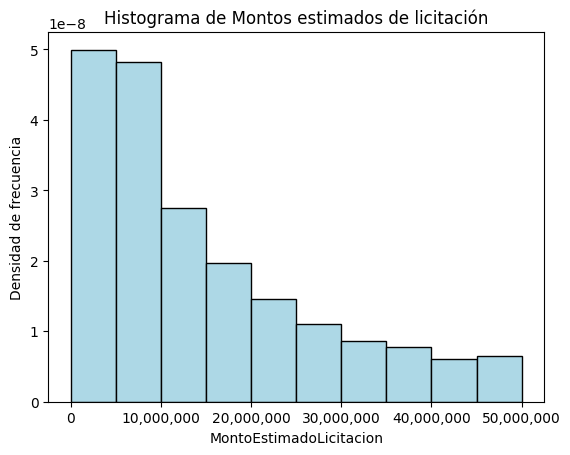

In [5]:
variable = "MontoEstimadoLicitacion"

df_temp = licitaciones[variable].copy(deep=True)

# Define the bins
#bins = np.arange(df[variable].min(), df[variable].max(), 400000) #this is the original hist 
bins = np.arange(df_temp.min(), df_temp.max(), 5000000) # 5M bins

# Histogram
counts, bin_edges = np.histogram(df_temp, bins=bins)

# Plotting
plt.hist(df_temp, bins=bins, color='lightblue', edgecolor='black', density=True)
#plt.title('Histograma de ' + variable)
plt.title('Histograma de Montos estimados de licitación')
plt.xlabel(variable)
plt.ylabel('Densidad de frecuencia')

# Format x-axis labels
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
# Format y-axis labels
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.10f}'.format(y)))

plt.show()

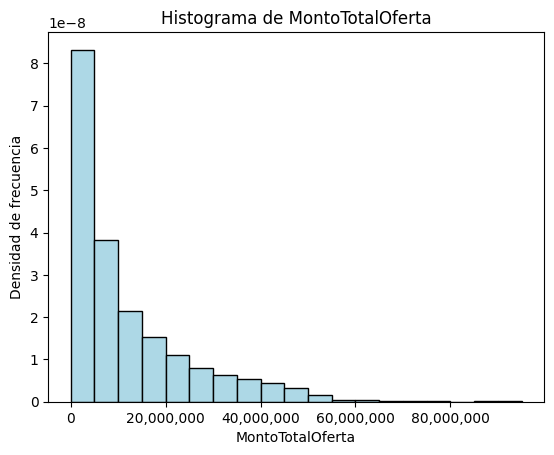

In [8]:
variable = "MontoTotalOferta"

df_temp = licitaciones[variable].copy(deep=True)

#convert to numeric
df_temp = pd.to_numeric(df_temp, errors='raise')

# Define the bins
#bins = np.arange(df[variable].min(), df[variable].max(), 400000) #this is the original hist 
bins = np.arange(df_temp.min(), df_temp.max(), 5000000) # 5M bins

# Histogram
counts, bin_edges = np.histogram(df_temp, bins=bins)

# Plotting
plt.hist(df_temp, bins=bins, color='lightblue', edgecolor='black', density=True)
plt.title('Histograma de ' + variable)
plt.xlabel(variable)
plt.ylabel('Densidad de frecuencia')

# Format x-axis labels
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
# Format y-axis labels
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.10f}'.format(y)))

plt.show()

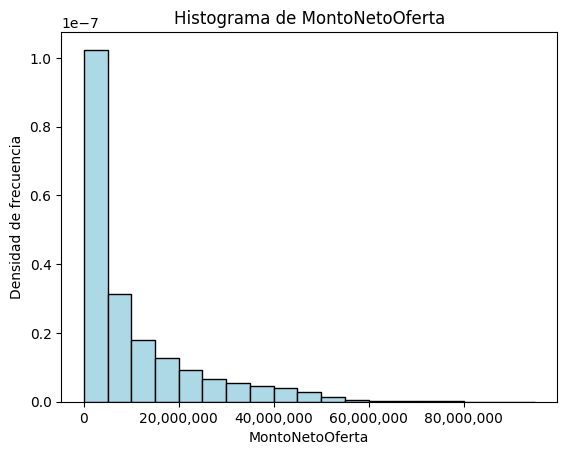

In [9]:
variable = "MontoNetoOferta"

df_temp = licitaciones[variable].copy(deep=True)

#convert to numeric
df_temp = pd.to_numeric(df_temp, errors='raise')

# Define the bins
#bins = np.arange(df[variable].min(), df[variable].max(), 400000) #this is the original hist 
bins = np.arange(df_temp.min(), df_temp.max(), 5000000) # 5M bins

# Histogram
counts, bin_edges = np.histogram(df_temp, bins=bins)

# Plotting
plt.hist(df_temp, bins=bins, color='lightblue', edgecolor='black', density=True)
plt.title('Histograma de ' + variable)
plt.xlabel(variable)
plt.ylabel('Densidad de frecuencia')

# Format x-axis labels
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
# Format y-axis labels
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.10f}'.format(y)))

plt.show()

['Meses' 'Horas' 'Dias' 'Semanas']


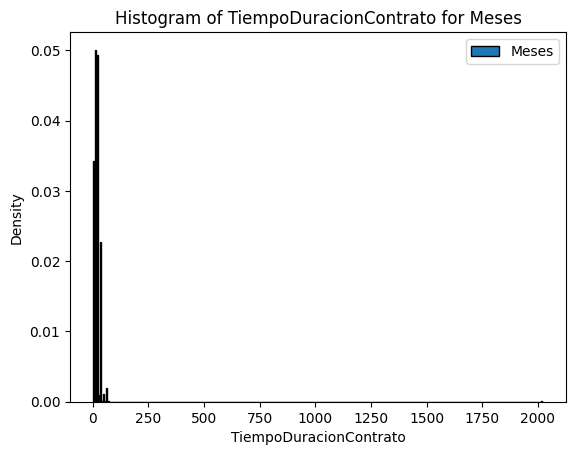

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000002D00DA1E660>
Traceback (most recent call last):
  File "c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\transforms.py", line 198, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))

KeyboardInterrupt: 


KeyboardInterrupt: 

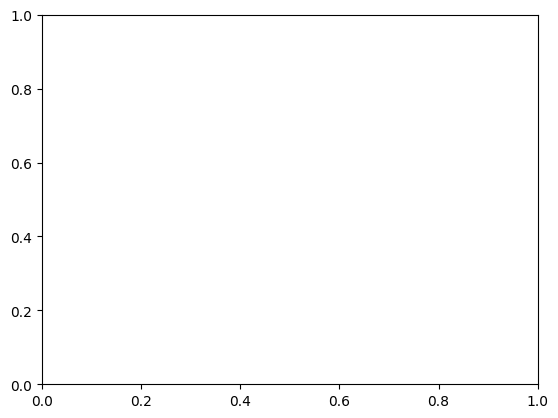

In [12]:
variable = "TiempoDuracionContrato"
sub_variable = "UnidadTiempoDuracionContrato"
valores = licitaciones[sub_variable].copy(deep=True).unique()
print(valores)

for valor in valores:
    df_temp = licitaciones[licitaciones[sub_variable] == valor]
    """
    Q1 = df_temp[variable].quantile(0.25)
    Q3 = df_temp[variable].quantile(0.75)
    IQR = Q3 - Q1

    # only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
    df_filtered = df_temp.query('(@Q1 - 1.5 * @IQR) <= '+variable+' <= (@Q3 + 1.5 * @IQR)')
    """
    df_filtered = df_temp

    if valor == "Horas":
        # we filter all 0 values SPECIFICALLY IN HORAS because they mean that the contract is not time bounded, then we filter again
        df_filtered = df_temp[df_temp[variable] > 0]
        """
        Q1 = df_filtered[variable].quantile(0.25)
        Q3 = df_filtered[variable].quantile(0.75)
        IQR = Q3 - Q1
        df_filtered = df_filtered.query('(@Q1 - 1.5 * @IQR) <= '+variable+' <= (@Q3 + 1.5 * @IQR)')
        """
    
    plt.figure()  # create a new figure
    binwidth = 5
    bins = range(int(min(df_filtered[variable])), int(max(df_filtered[variable])) + binwidth, binwidth)
    plt.hist(df_filtered[variable], bins=bins, label=valor, density=True, edgecolor='black')
    plt.title('Histogram of ' + variable + ' for ' + valor)
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.legend()  # show legend
    plt.show()  # display the figure

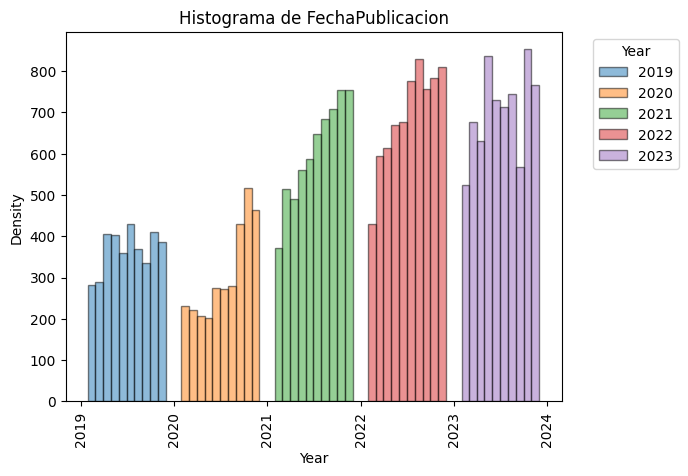

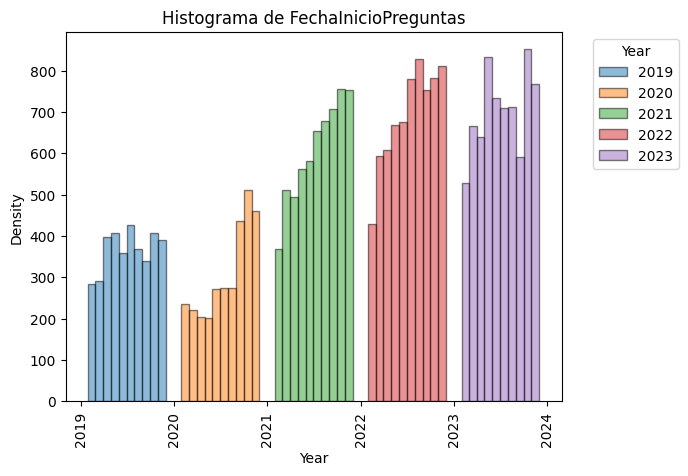

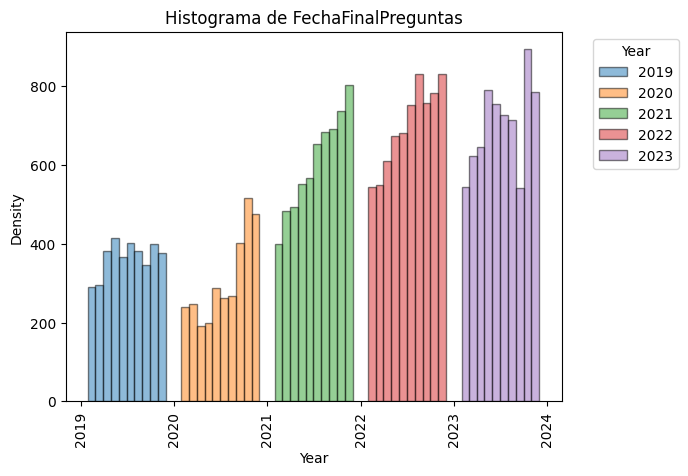

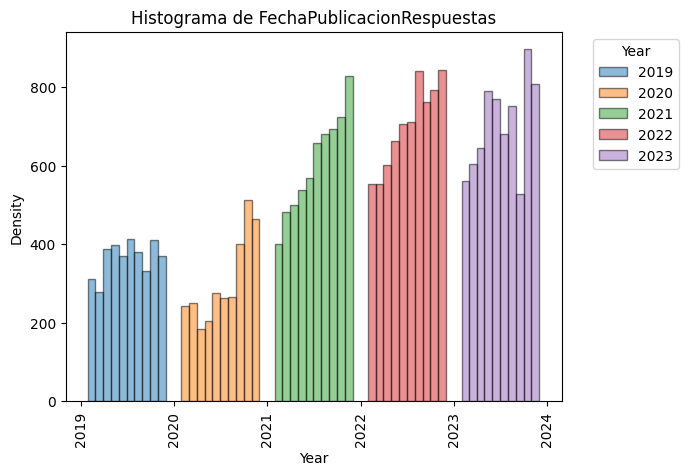

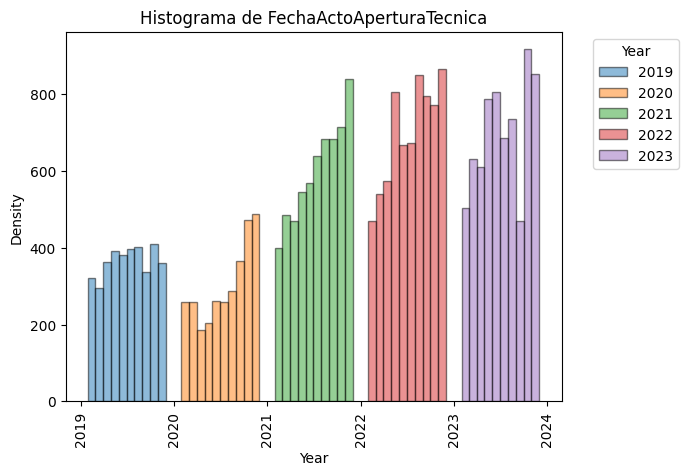

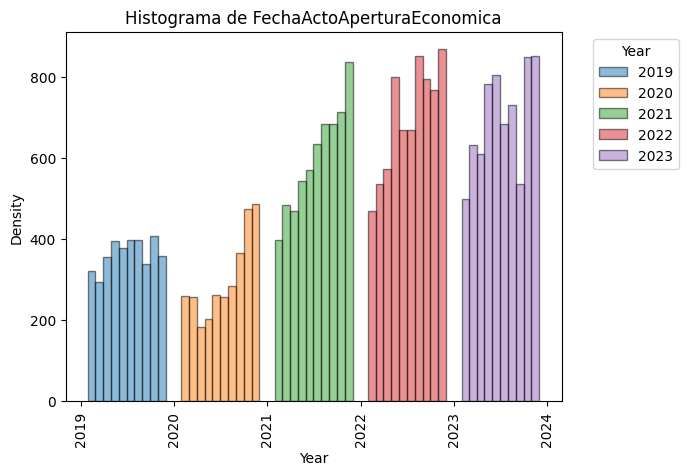

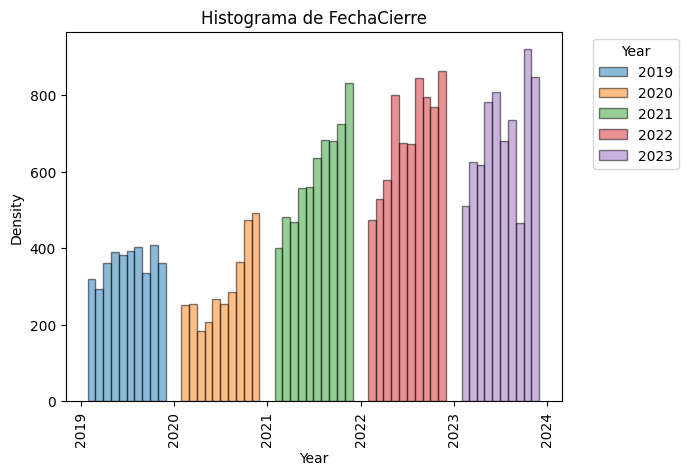

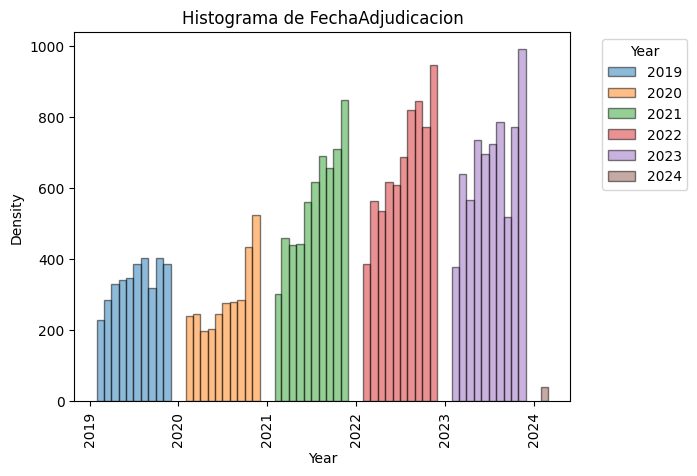

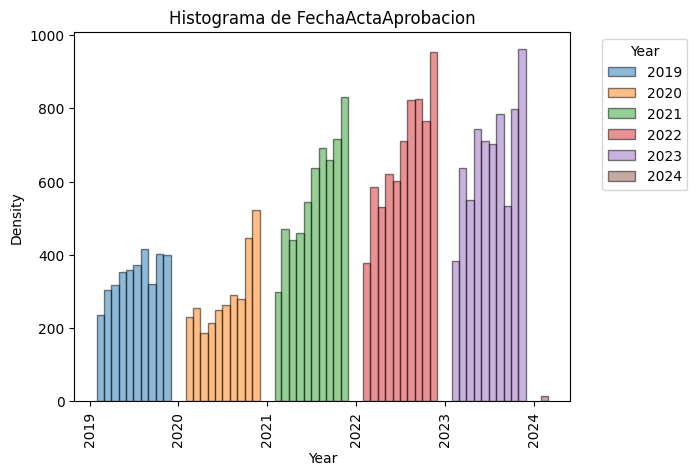

In [10]:
import matplotlib.dates as mdates

var_temp = ["FechaPublicacion", "FechaInicioPreguntas", "FechaFinalPreguntas", "FechaPublicacionRespuestas",
            "FechaActoAperturaTecnica", "FechaActoAperturaEconomica", "FechaCierre", "FechaAdjudicacion", "FechaActaAprobacion"]

# all time plotting should be done as month bins

for var in var_temp:
    # here we format the date to a datetime object so we can filter it by month
    data = pd.to_datetime(licitaciones[var], format="%d-%m-%Y %H:%M:%S", errors='coerce')
    data = data.dt.to_period("m").dt.to_timestamp()
    # remove data before 2019
    #data = data[data.dt.year >= 2019]
    bins = pd.date_range(data.min(), data.max(), freq='m')

    # Group data by year
    grouped_data = data.groupby(data.dt.year)

    # Plot each year's data with a different color
    for year, group in grouped_data:
        plt.hist(group, bins=pd.date_range(group.min(), group.max(), freq='M'), density=False, edgecolor='black', alpha=0.5, label=str(year))


    
        #plt.hist(data, bins=bins, density=True, edgecolor='black', color='lightblue')
    plt.ylabel("Density")
    plt.title("Histograma de " + var)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xticks(rotation=90)
    plt.xlabel("Year")
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()


c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

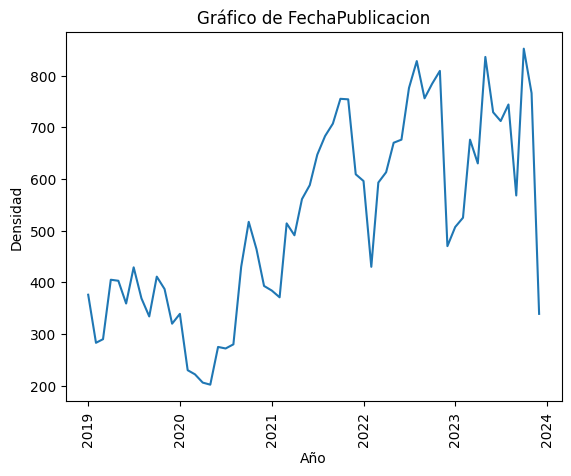

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

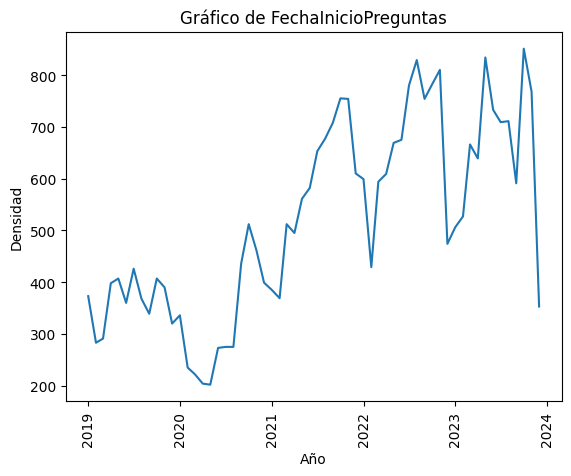

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

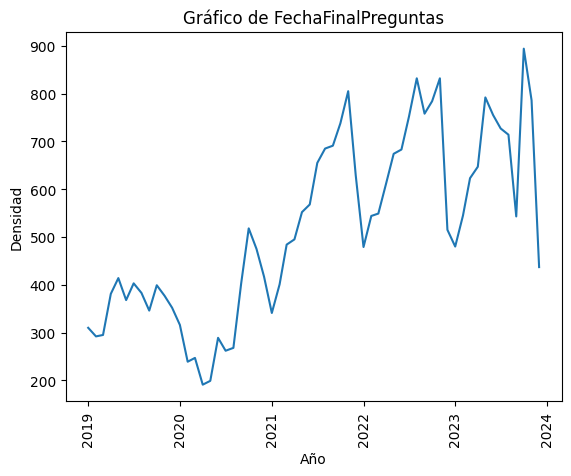

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

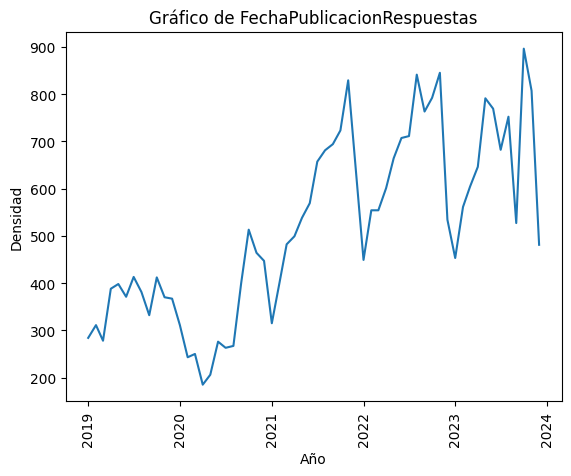

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

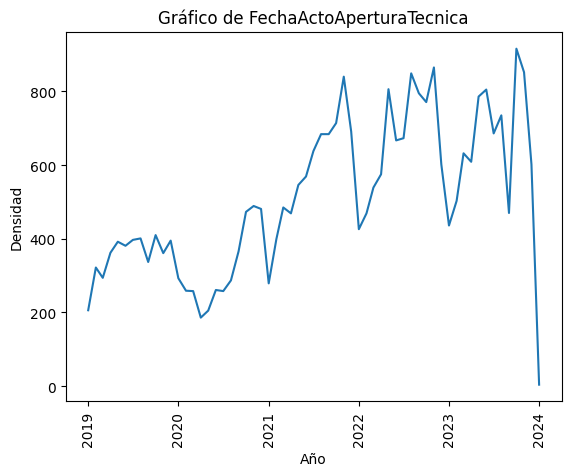

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

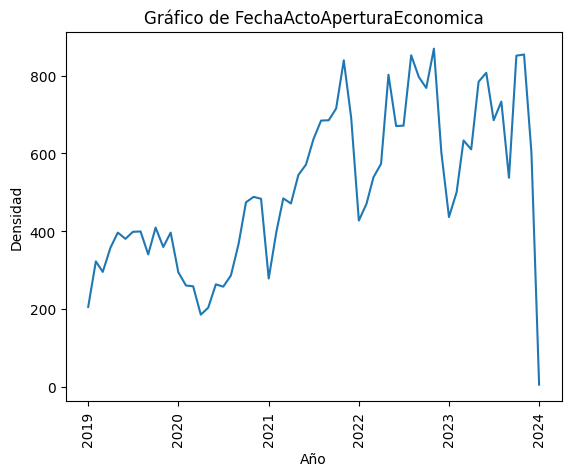

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

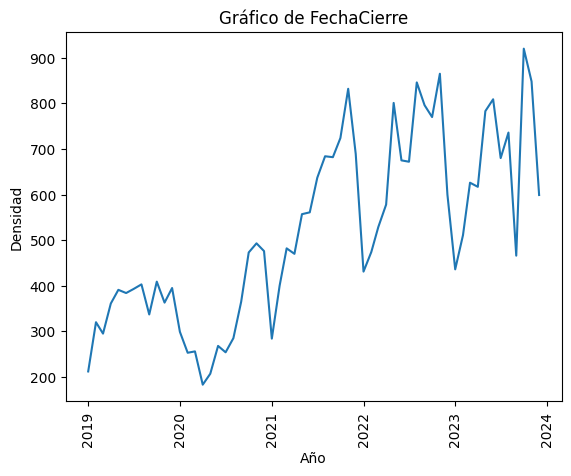

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

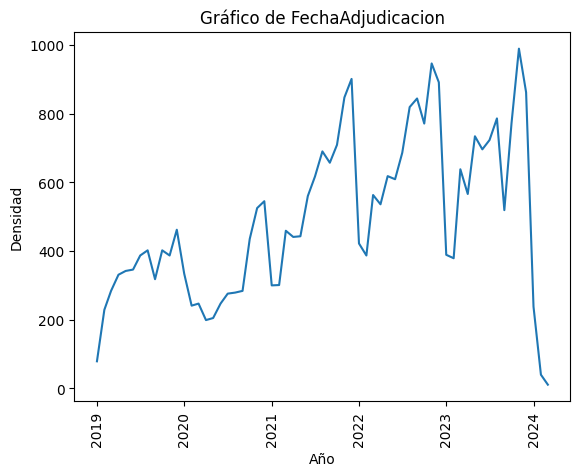

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

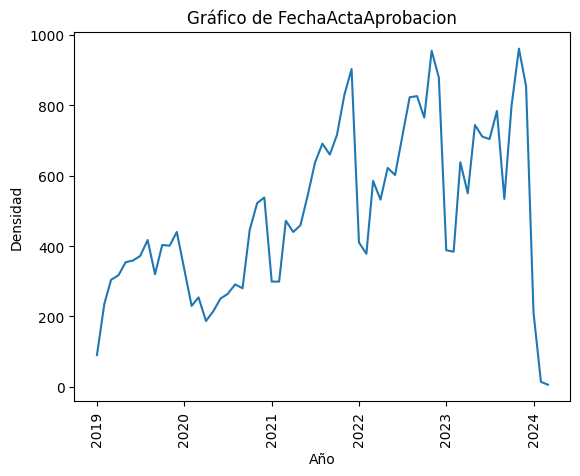

In [12]:
import seaborn as sns

var_temp = ["FechaPublicacion", "FechaInicioPreguntas", "FechaFinalPreguntas", "FechaPublicacionRespuestas",
            "FechaActoAperturaTecnica", "FechaActoAperturaEconomica", "FechaCierre", "FechaAdjudicacion", "FechaActaAprobacion"]

for var in var_temp:
    # Convert the date to a datetime object and filter it by month
    data = pd.to_datetime(licitaciones[var], format="%d-%m-%Y %H:%M:%S", errors='coerce')
    data = data.dt.to_period("M").dt.to_timestamp()
    data = data.value_counts().sort_index()

    # Plot the line graph
    sns.lineplot(x=data.index, y=data.values)

    plt.ylabel("Densidad")
    plt.title("Gráfico de " + var)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xticks(rotation=90)
    plt.xlabel("Año")
    plt.show()

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


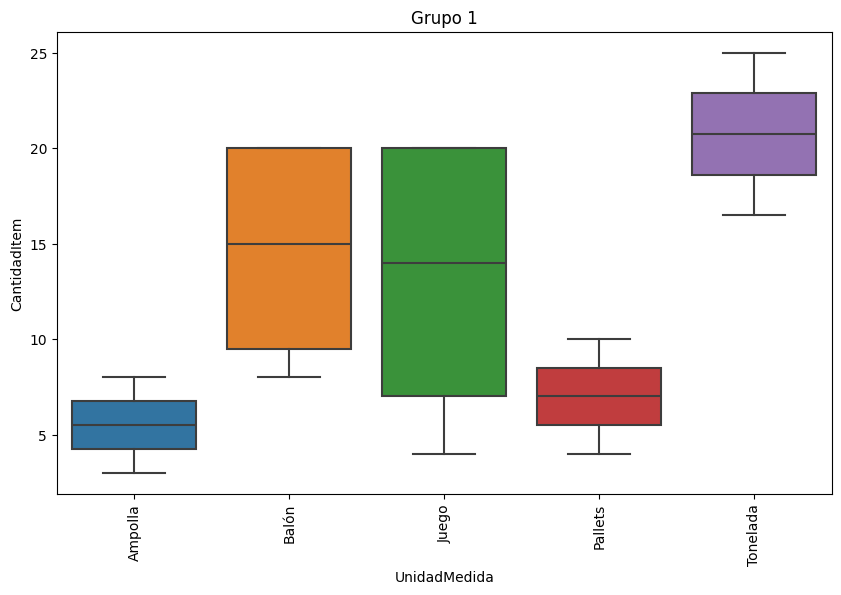

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


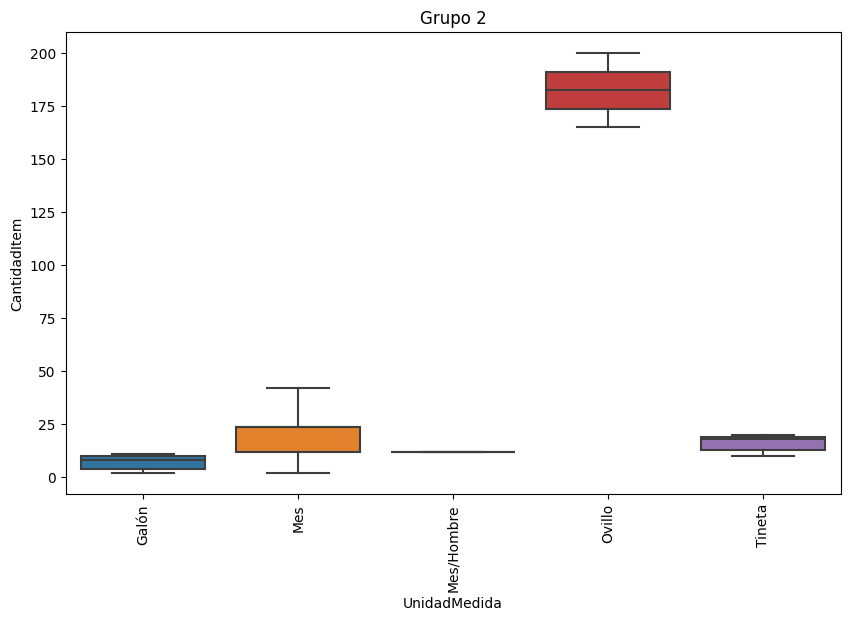

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


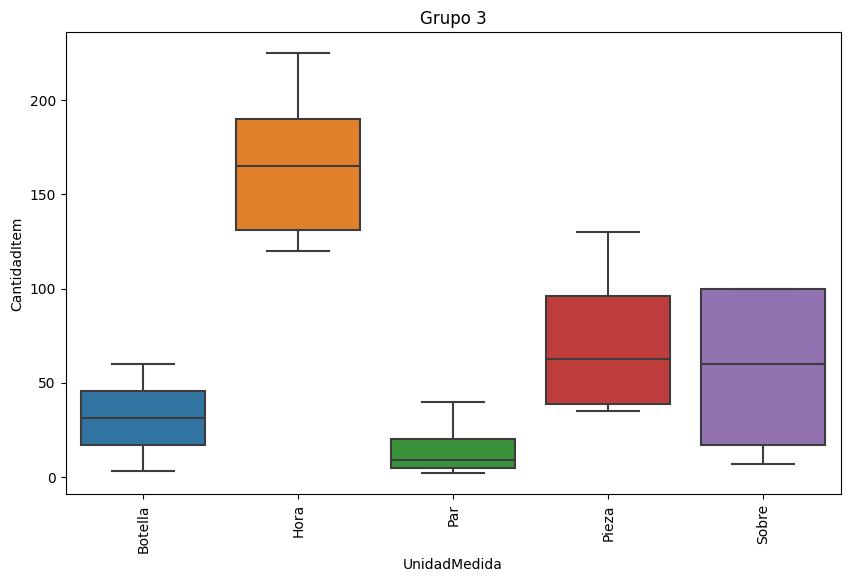

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


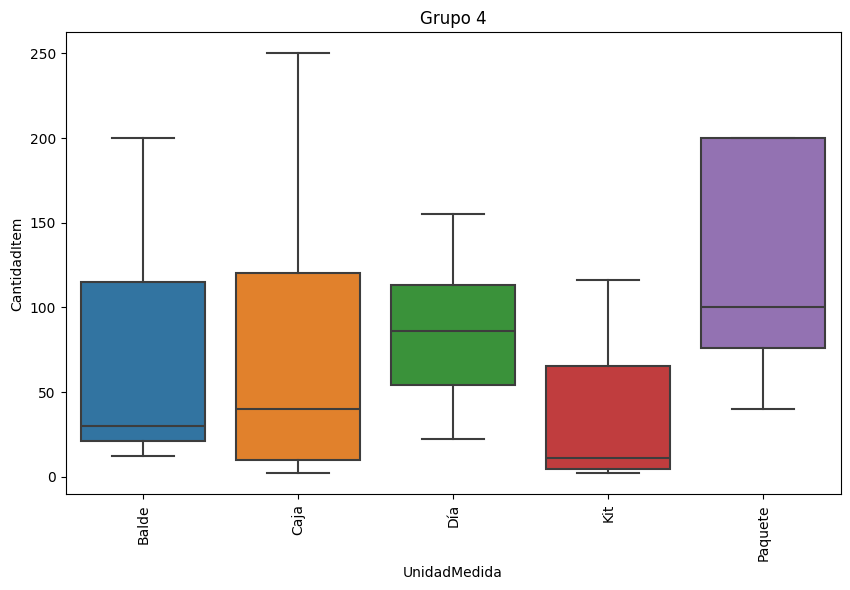

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


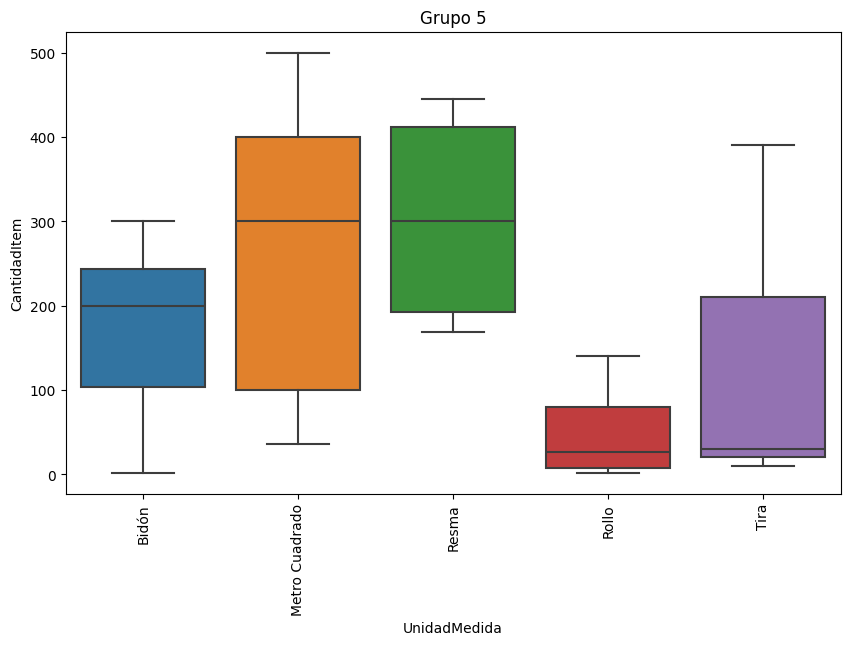

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


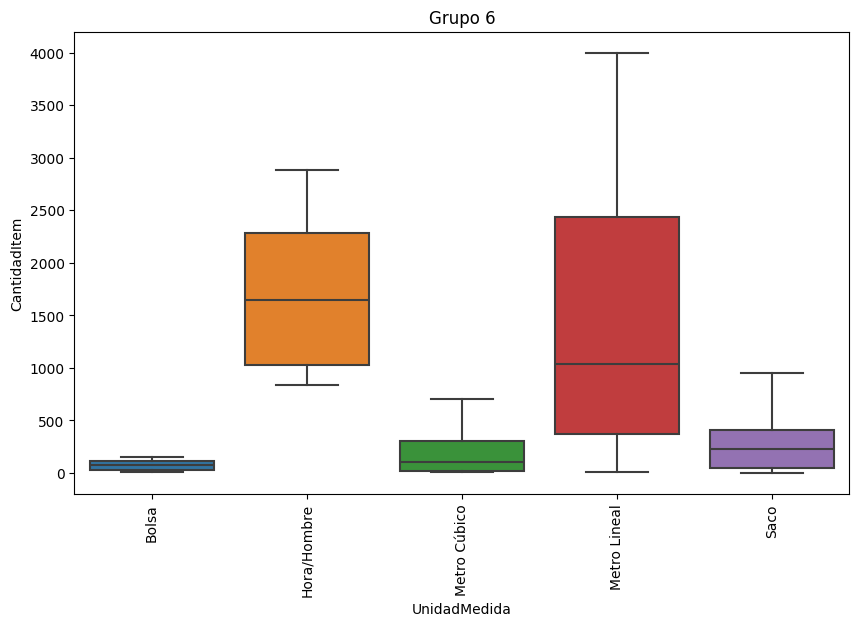

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


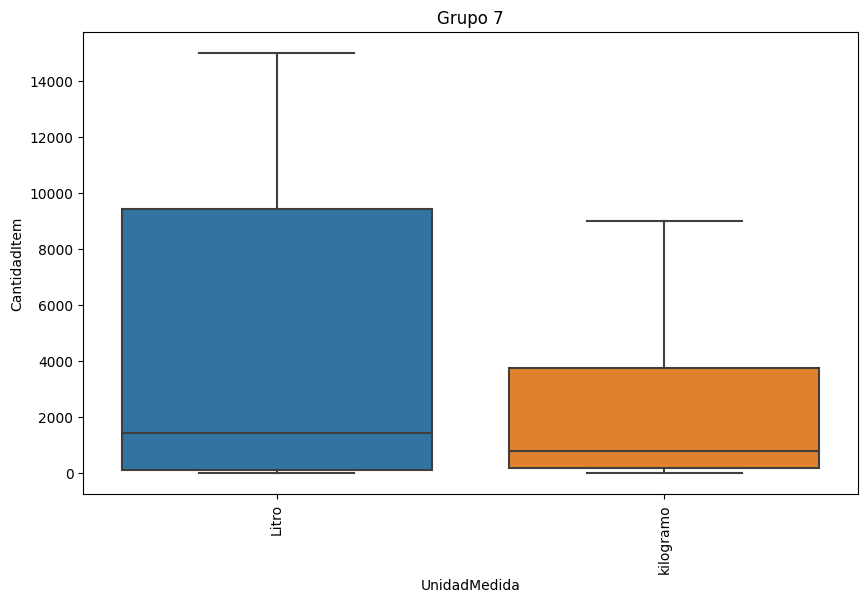

'\ndf_temp.head() =\n        CantidadItem\tUnidadMedida\n0\t    1.0\t            Ampolla\n1\t    1.0\t            Ampolla\n2\t    1.0\t            Ampolla\n3\t    1.0\t            Ampolla\n4\t    1.0\t            Ampolla\n5\t    1.0\t            Ampolla\n6\t    1.0\t            Ampolla\n7\t    1.0\t            Ampolla\n8\t    1.0\t            Ampolla\n9\t    1.0\t            Ampolla\n10\t    1.0\t            Ampolla\n'

In [11]:
# NO OLVIDAR QUE LA CantidadItem TIENE RELACION DIRECTA CON UNIDADES DE MEDICION
variable = "CantidadItem"
sub_variable = "UnidadMedida"
valores = licitaciones[sub_variable].copy(deep=True).unique()

df_temp = licitaciones[[variable, sub_variable]].copy(deep=True)

df_temp[variable] = pd.to_numeric(df_temp[variable], errors='coerce')


# THE NEXT CODE SHOULDN'T BE IN EDA, FILTERING DATA IS PART OF ETL

# Drop rows where variable is NaN
df_temp = df_temp.dropna(subset=[variable])

def filter_outliers(group, variable):
    Q1 = group[variable].quantile(0.25)
    Q3 = group[variable].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (group[variable] < (Q1 - 1.5 * IQR)) | (group[variable] > (Q3 + 1.5 * IQR))
    while outliers.any():
        group = group[~outliers]
        outliers = (group[variable] < (Q1 - 1.5 * IQR)) | (group[variable] > (Q3 + 1.5 * IQR))
    return group

# Apply the function to each group of UnidadMedida
df_temp = df_temp.groupby(sub_variable).apply(filter_outliers, variable=variable).reset_index(drop=True)
# Before sorting delete all 0 and 1 values
df_temp = df_temp[df_temp[variable] > 1]
# Delete all groups of UnidadMedida that has a range lesser than 1
df_temp = df_temp.groupby(sub_variable).filter(lambda x: x[variable].max() - x[variable].min() > 1)

# END OF THE BAD CODE


# Step 1: Sort the unique values of UnidadMedida by the median of CantidadItem for each group
medians = df_temp.groupby(sub_variable)[variable].median().sort_values()
unique_values_sorted = medians.index.tolist()

# Step 2: Split the sorted unique values into batches of 10
batches = [unique_values_sorted[i:i + 10] for i in range(0, len(unique_values_sorted), 10)]

# Calcular la variabilidad de las magnitudes por cada grupo de UnidadMedida
variabilidad = df_temp.groupby(sub_variable)[variable].apply(lambda x: x.max() - x.min())

# Ordenar los grupos de UnidadMedida por la variabilidad de sus magnitudes
grupos_ordenados = variabilidad.sort_values().index

# Definir el número máximo de grupos que deseas crear
num_grupos = 5  # Puedes ajustar este valor según tus necesidades

# Dividir los grupos de UnidadMedida en grupos de magnitudes similares
grupos = [grupos_ordenados[i:i + num_grupos] for i in range(0, len(grupos_ordenados), num_grupos)]

# Crear visualizaciones para cada grupo de UnidadMedida
for i, grupo in enumerate(grupos):
    df_grupo = df_temp[df_temp[sub_variable].isin(grupo)]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=sub_variable, y=variable, data=df_grupo, showfliers=False)
    plt.title(f'Grupo {i+1}')
    plt.xticks(rotation=90)
    plt.show()

"""
df_temp.head() =
        CantidadItem	UnidadMedida
0	    1.0	            Ampolla
1	    1.0	            Ampolla
2	    1.0	            Ampolla
3	    1.0	            Ampolla
4	    1.0	            Ampolla
5	    1.0	            Ampolla
6	    1.0	            Ampolla
7	    1.0	            Ampolla
8	    1.0	            Ampolla
9	    1.0	            Ampolla
10	    1.0	            Ampolla
"""

In [32]:
licitaciones["UnidadMedida"].unique()

array(['Unidad', 'Global', 'Metro Cúbico', 'Mes', 'kilogramo', 'Caja',
       'Galón', 'Metro Lineal', 'Unidad no definida', 'Frasco', 'Par',
       'Hora', 'Litro', 'Mes/Hombre', 'Frasco Ampolla', 'Ampolla',
       'Comprimido', 'Dosis', 'Año', 'Rollo', 'Kit', 'Saco', 'Paquete',
       'Hora/Hombre', 'Metro Cuadrado', 'Unidad Internacional', 'Tineta',
       'Juego', 'Supositorio', 'Pack', 'Bidón', 'Milímetro', 'Bolsa',
       'Cilindro', 'Tira', 'Día', 'Pie', 'Tonelada', 'Cartón', 'Tubo',
       'Sobre', 'Pomo', 'Botella', 'Pieza', 'Sachet', 'Cápsula', 'Lata',
       'Ovillo', 'Matraz', 'Día/Hombre', 'Balde', 'Talonario',
       'Milígramo', 'Pallets', 'Resma', 'Balón', 'Tambor', 'Rack',
       'Plancha', 'Semana', 'Cartucho'], dtype=object)

In [33]:
sub_var1 = "UnidadMedida"
sub_var2 = "Cartucho"
var = "CantidadItem"

# get all CantidadesItem for UnidadMedida == Ampolla

df_temp = licitaciones[licitaciones[sub_var1] == sub_var2].copy(deep=True)

# print only DescripcionITem, CantidadItem, Descripcion and NroLicitacion
df_temp = df_temp[[var, "CantidadOferta" , "UnidadMedida", "DescripcionItem", "Descripcion", "NroLicitacion", "ResultadoOferta"]]

# text in DescripcionItem and Descripcion is bigger than head shows, change the display settings
pd.set_option('display.max_colwidth', None)


df_temp.head(50)

,CantidadItem,CantidadOferta,UnidadMedida,DescripcionItem,Descripcion,NroLicitacion,ResultadoOferta
679683,138000,138000,Cartucho,CARTUCHO CALIBRE 9X19 MM PARABELLUM,"LA ESCUELA DE GENDARMERÍA DE CHILE REQUIERE LA ADQUISICIÓN DE MUNICIONES DE DISTINTOS CALIBRES. PROCESO CONSIDERA ENTREGA DE MUESTRA OBLIGATORIA, SEGÚN LO INDICADO EN BASES DE LICITACIÓN.",634-72-LQ23,Ganadora


In [5]:
var_cualitativa = ["RegionProveedor", "NroLicitacion", "NombreLicitacion", "TipoLicitacion", "Descripcion", "MonedaLicitacion", "MontoEstimadoVisible",
                   "BaseEstimacionMontoLicitacion", "UnidadTiempoEvaluacion", "EstadoLicitacion", "ContemplaObrasPublicas", "LicitacionInformada",
                   "TipoAdjudicacion", "TipoAprobacionAdjudicacion", "NumeroActaAprobacion", "TipoConvocatoria", "NroEtapasLicitacion", 
                   "SubContratacion", "PublicidadOfertasTecnicas", "Contrato", "UnidadTiempoDuracionContrato", "TipoEjecucion", "PlazoPagoContrato",
                   "TipoPago", "ExtensionPlazo", "UnidadCompra", "UnidadCompraRUT", "entCode", "Institucion", "Sector", "RubroN1", "RubroN2", "RubroN3",
                   "CodigoProductoONU", "ONUProducto", "NombreItem", "DescripcionItem", "UnidadMedida", "Proveedor", "ProveedorRUT", "ActividadProveedor",
                   "TamanoProveedor", "NombreOferta", "EstadoOferta", "ResultadoOferta", "sector", "Institución", "RUT Unidad de Compra", 
                   "Región Unidad de Compra"]

# TODO: could not consider graphing the following variables: NroLicitacion, NombreLicitacion, NumeroActaAprobacion,  entCode, CodigoProductoONU
# Proveedor and ProveedorRUT are the same variable but with different names, same relation can also be considered in: 
# "UnidadCompra"-"UnidadCompraRUT"-"RUT Unidad de Compra", 

In [6]:
def pie_chart(var, df, num_explode, num_labels=10, percentage=1):
    df_temp = df[var].value_counts()

    # Combine all slices after the first num_labels into an "Other" slice
    if num_labels > 0 and len(df_temp) > num_labels:
        other = pd.Series([df_temp[num_labels:].sum()], index=['Otros'])
        df_temp = pd.concat([df_temp[:num_labels], other])

    if num_explode > 0:
        explode = [0.1]*num_explode + [0]*max(0, len(df_temp)-num_explode)
    else:
        explode = [0]*len(df_temp)

    # Counter for autopct
    autopct_counter = [0]

    def autopct_format(p):
        autopct_counter[0] += 1
        if num_labels == 0 or autopct_counter[0] <= num_labels or df_temp.index[autopct_counter[0]-1] == 'Otros':
            return '{:.1f}%  ({:,.0f})'.format(p, (p/100)*df_temp.sum())
        else:
            return ''

    # Create color list
    colors = plt.cm.tab20.colors
    if len(df_temp) > len(colors):
        colors = colors + ['grey'] * (len(df_temp) - len(colors))
    patches, texts, autotexts = plt.pie(df_temp, autopct=autopct_format,
                                        startangle=0, counterclock=False, pctdistance=1.2, labeldistance=1.1,
                                        explode=explode, colors=colors)

    for autotext in autotexts:
        if autotext.get_text() != '' and float(autotext.get_text().split('%')[0]) < percentage:
            autotext.set_visible(False)

    plt.title(var)

    # Modify labels for legend
    labels = df_temp.index.tolist()

    plt.legend(labels, title="Labels", loc="center left", bbox_to_anchor=(1.15, 0, 0.5, 1))

    plt.show()

In [7]:
def bar_chart(var, df):
    df_temp = df[var].value_counts()

    ax = df_temp.plot(kind='bar', color='lightblue', edgecolor='black')

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.title(var)

    plt.show()

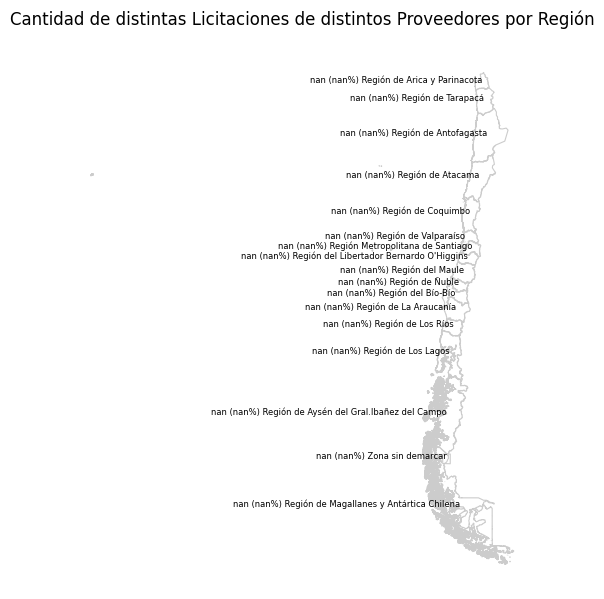

In [8]:
var = "RegionProveedor"

# Load the data
chile_map = gpd.read_file('Regional.shp', encoding='utf-8-sig')
df_temp = proveedores[var].copy(deep=True).value_counts().reset_index()
df_temp.columns = ['RegionProveedor', 'count']

region_mapping = {
    'región metropolitana de santiago': 'Región Metropolitana de Santiago',
    'región de valparaíso': 'Región de Valparaíso',
    'región del biobío': 'Región del Bío-Bío',
    'región de la araucanía': 'Región de La Araucanía',
    'región aysén del general carlos ibáñez del campo': 'Región de Aysén del Gral.Ibañez del Campo',
    'región del maule': 'Región del Maule',
    'región de los lagos': 'Región de Los Lagos',
    'región del libertador general bernardo o´higgins': "Región del Libertador Bernardo O'Higgins",
    'región del ñuble': 'Región de Ñuble',
    'región de coquimbo': 'Región de Coquimbo',
    'región de arica y parinacota': 'Región de Arica y Parinacota',
    'región de magallanes y de la antártica': 'Región de Magallanes y Antártica Chilena',
    'región de tarapacá': 'Región de Tarapacá',
    'región de antofagasta': 'Región de Antofagasta',
    'región de los ríos': 'Región de Los Ríos',
    'región de atacama': 'Región de Atacama'
}
# Calculate the total count
total_count = df_temp['count'].sum()

# Calculate the percentage for each region
df_temp['percentage'] = df_temp['count'] / total_count * 100

# Use the dictionary to replace the region names in df_temp
df_temp[var] = df_temp[var].map(region_mapping)

# Merge the dataframes
merged = chile_map.set_index('Region').join(df_temp.set_index(var))

# Calculate the centroid of each region
merged['centroid'] = merged.geometry.centroid

# Create a new figure with a larger size
fig, ax = plt.subplots(1, 1, figsize=(6, 30))  # Adjust the size as needed

# Plot the map
merged.boundary.plot(ax=ax, linewidth=0.8, edgecolor='0.8')

# Plot circles at the centroid of each region
for idx, row in merged.iterrows():
    diameter = np.sqrt(row['count']/5 / np.pi) * 2 # scaling factor is set to diameter so the plot is more readable
    plt.plot(row['centroid'].x, row['centroid'].y, 'o', markersize=diameter) 
    text = f"{row['count']} ({row['percentage']:.2f}%)" + " " + idx
    plt.text(row['centroid'].x, row['centroid'].y, text, horizontalalignment='right', fontsize=6)  # Add the region name to the left of the circle

# Remove the coordinates from the axes
ax.axis('off')

# Add a title
plt.title('Cantidad de distintas Licitaciones de distintos Proveedores por Región')

plt.show()


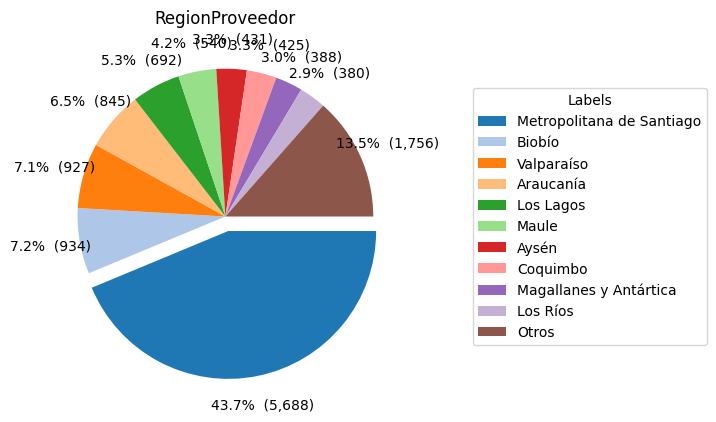

In [38]:
var = "RegionProveedor"

# from now on we plot as pie or bar, not hist, because we have categorical values
pie_chart(var, proveedores, 1)

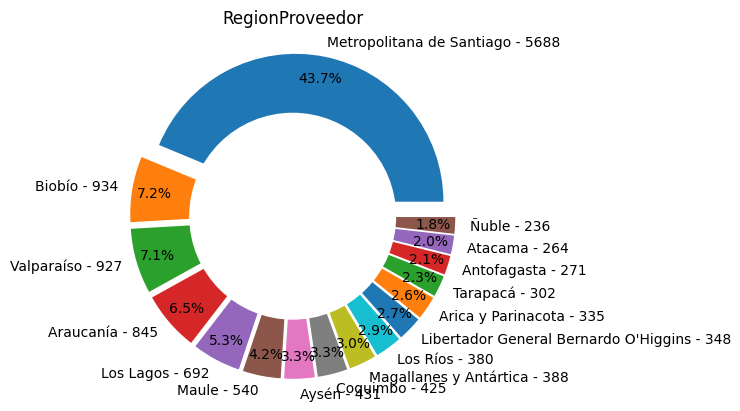

In [14]:
#Testing regionproveedor
def pie_chart(var, df):
    fig, ax = plt.subplots()
    counts = df[var].value_counts()
    explode = [0.1]*len(counts)  # create a list of length equal to the number of pie slices
    labels = [f'{label} - {count}' for label, count in zip(counts.index, counts.values)]  # modify labels to include count
    ax.pie(counts, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=0.85)
    # Draw a circle at the center to turn the pie into a donut
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(var)
    plt.show()

var = "RegionProveedor"
pie_chart(var, proveedores)

In [ ]:
def pie_chart(var, df):
    fig, ax = plt.subplots()
    counts = df[var].value_counts()
    explode = [0.1]*len(counts)  # create a list of length equal to the number of pie slices
    labels = [f'{label} - {count}' for label, count in zip(counts.index, counts.values)]  # modify labels to include count
    ax.pie(counts, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=0.85, textprops={'rotation': 'auto'})
    # Draw a circle at the center to turn the pie into a donut
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(var)
    plt.show()

var = "RegionProveedor"
pie_chart(var, proveedores)

In [ ]:
var = "RegionProveedor"

# from now on we plot as pie or bar, not hist, because we have categorical values
pie_chart(var, proveedores, 1, num_labels=0)

In [ ]:
var = "RegionProveedor"
norte_grande = ["región de arica y parinacota", "región de tarapacá", "región de antofagasta"]
norte_chico = ["región de atacama", "región de coquimbo"]
centro = ["región de valparaíso", "región metropolitana de santiago", "región del libertador general bernardo o´higgins", "región del maule", "región del biobío", "región del ñuble"]
sur = ["región de la araucanía", "región de los ríos", "región de los lagos"]
austral = ["región de magallanes y de la antártica", "región aysén del general carlos ibáñez del campo"]

# plot RegionProveedor licitaciones by macrozones
# per each macrozone we will count how many ProveedorRUT are in each region so we plot them as pie chart

df_temp = proveedores.copy(deep=True)
new_var = "Proveedores segun macrozona"
df_temp[new_var] = 'Otros'
df_temp.loc[df_temp['RegionProveedor'].isin(norte_grande), new_var] = 'Norte Grande'
df_temp.loc[df_temp['RegionProveedor'].isin(norte_chico), new_var] = 'Norte Chico'
df_temp.loc[df_temp['RegionProveedor'].isin(centro), new_var] = 'Centro'
df_temp.loc[df_temp['RegionProveedor'].isin(sur), new_var] = 'Sur'
df_temp.loc[df_temp['RegionProveedor'].isin(austral), new_var] = 'Austral'

pie_chart(new_var, df_temp, 1)

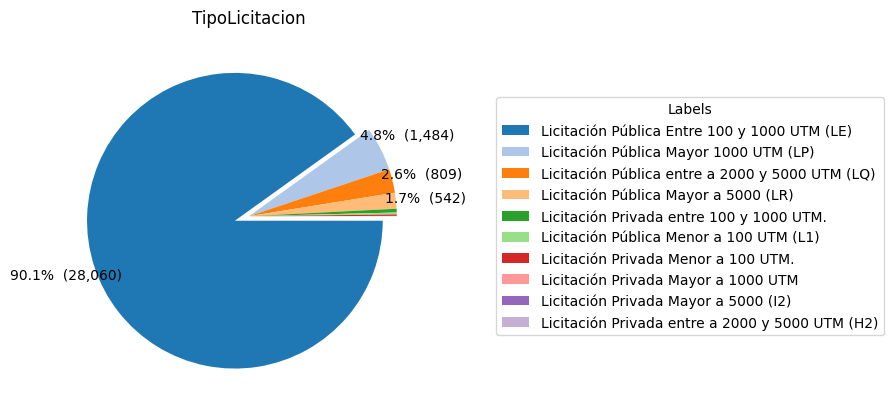

In [39]:
var = "TipoLicitacion"

pie_chart(var, licitaciones, 1)

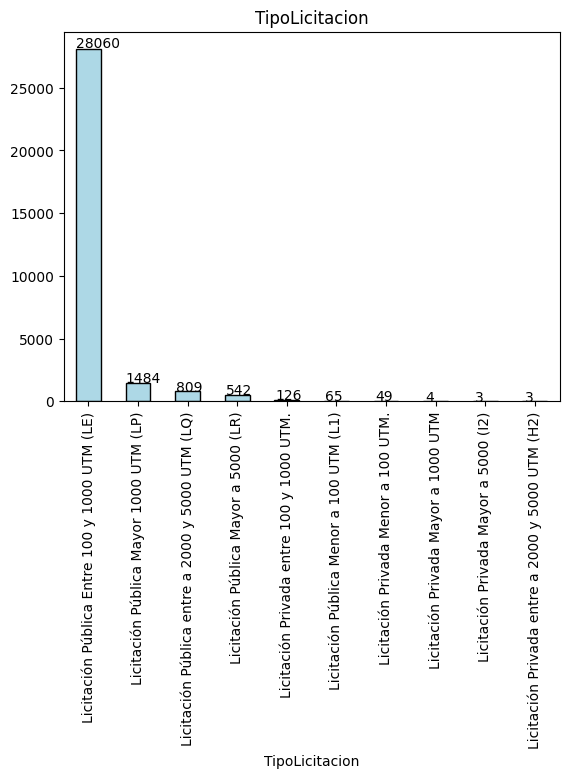

In [40]:
var = "TipoLicitacion"

bar_chart(var, licitaciones)

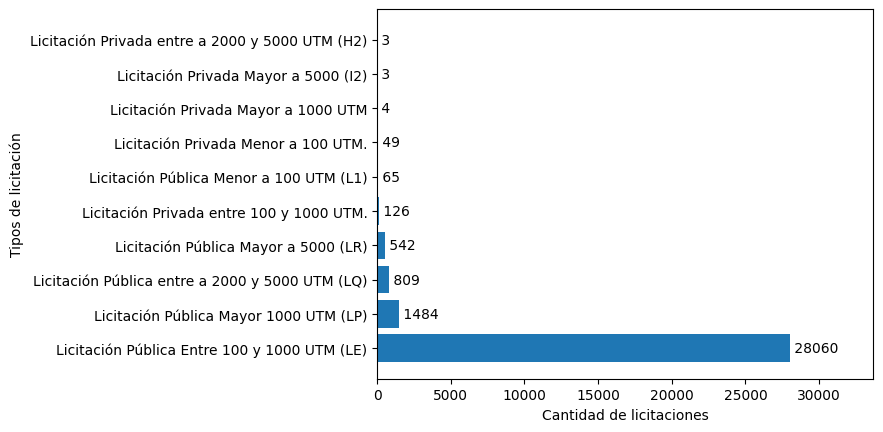

In [20]:
def horizontal_bar_chart(var, df):
    counts = df[var].value_counts()
    bars = plt.barh(counts.index, counts.values)  # use plt.barh for horizontal bar chart
    plt.xlabel('Cantidad de licitaciones')
    plt.ylabel('Tipos de licitación')
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f' {width}', va='center')
    
    plt.xlim(0, max(counts.values)*1.2)  # increase x-axis limit to accommodate text
    plt.show()

var = "TipoLicitacion"
horizontal_bar_chart(var, licitaciones)

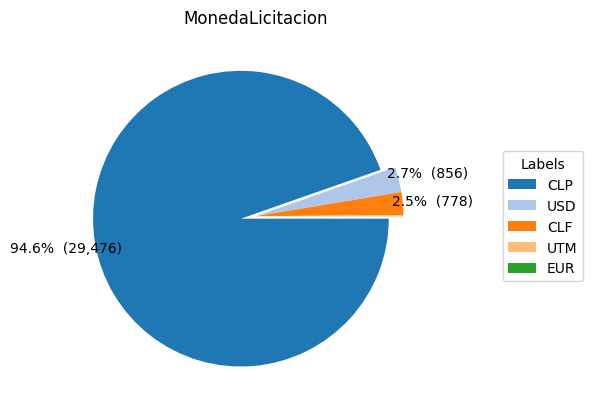

In [41]:
var = "MonedaLicitacion"

pie_chart(var, licitaciones, 1)

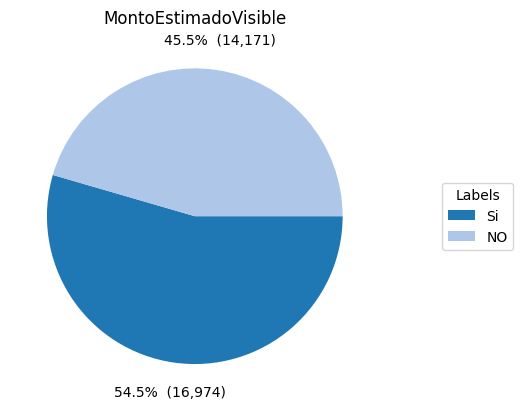

In [42]:
var = "MontoEstimadoVisible"

pie_chart(var, licitaciones, 0)

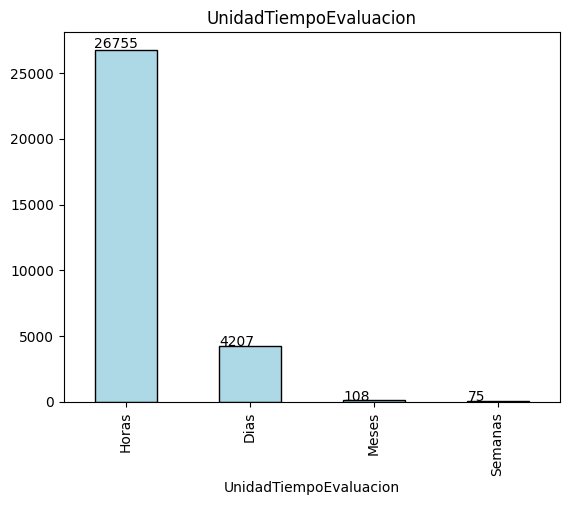

In [43]:
var = "UnidadTiempoEvaluacion"

bar_chart(var, licitaciones)

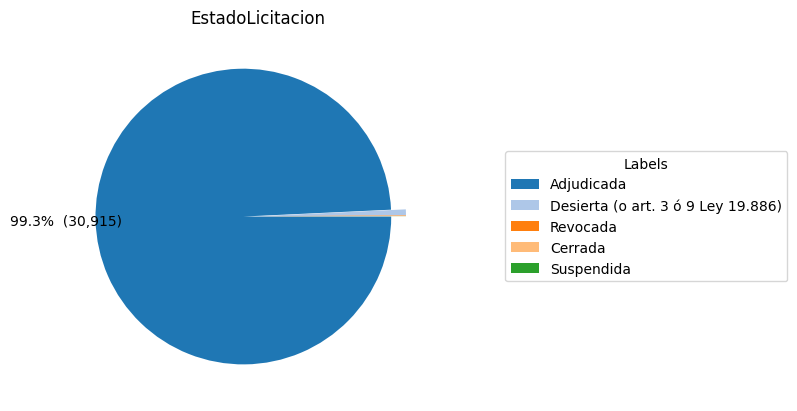

In [44]:
var = "EstadoLicitacion"

pie_chart(var, licitaciones, 1)

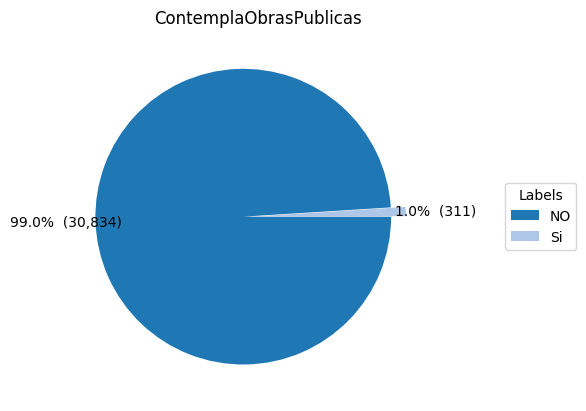

In [45]:
var = "ContemplaObrasPublicas"

pie_chart(var, licitaciones, 1)

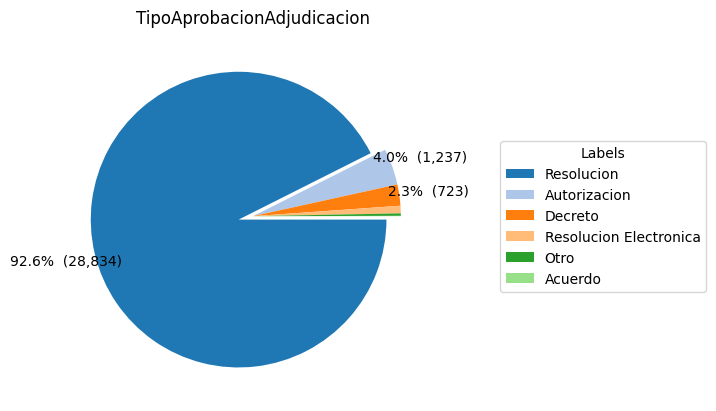

In [46]:
var = "TipoAprobacionAdjudicacion"

pie_chart(var, licitaciones, 1)

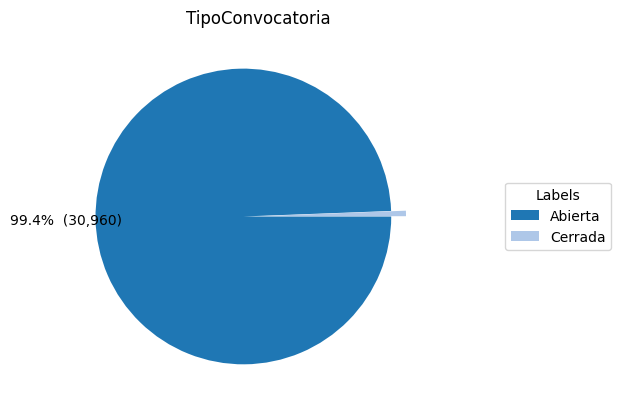

In [47]:
var = "TipoConvocatoria"

pie_chart(var, licitaciones, 1)

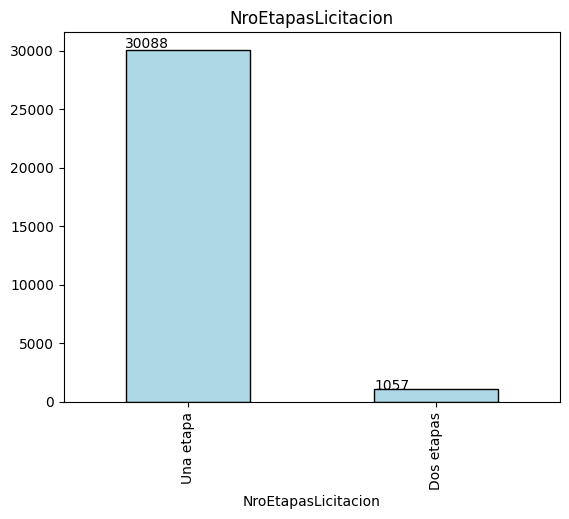

In [48]:
var = "NroEtapasLicitacion"

bar_chart(var, licitaciones)

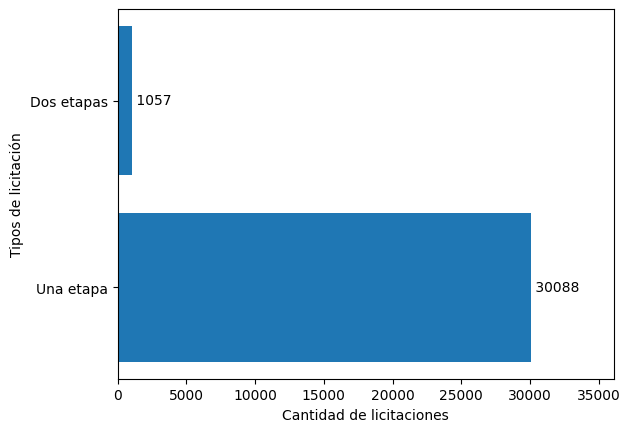

In [21]:
def horizontal_bar_chart(var, df):
    counts = df[var].value_counts()
    bars = plt.barh(counts.index, counts.values)  # use plt.barh for horizontal bar chart
    plt.xlabel('Cantidad de etapas de licitación')
    plt.ylabel('Frecuencia de etapas de licitación')
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f' {width}', va='center')
    
    plt.xlim(0, max(counts.values)*1.2)  # increase x-axis limit to accommodate text
    plt.show()

var = "NroEtapasLicitacion"
horizontal_bar_chart(var, licitaciones)

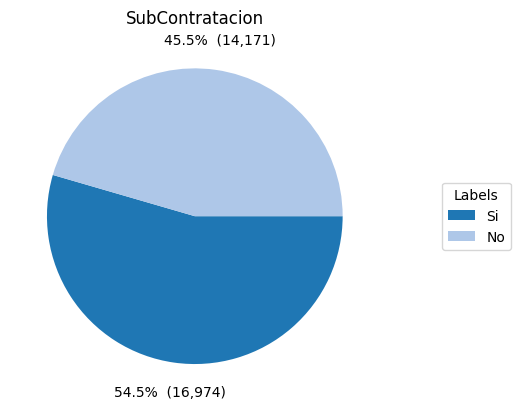

In [49]:
var = "SubContratacion"

pie_chart(var, licitaciones, 0)

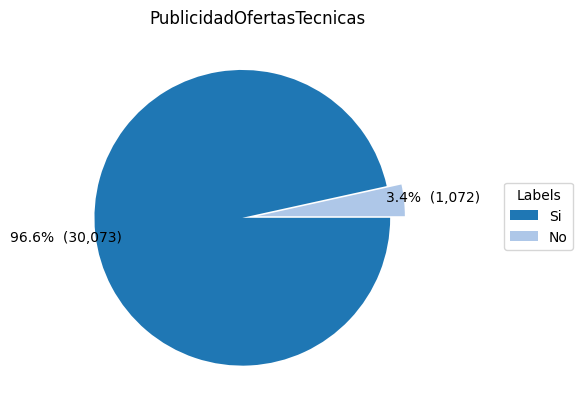

In [50]:
var = "PublicidadOfertasTecnicas"

pie_chart(var, licitaciones, 1)

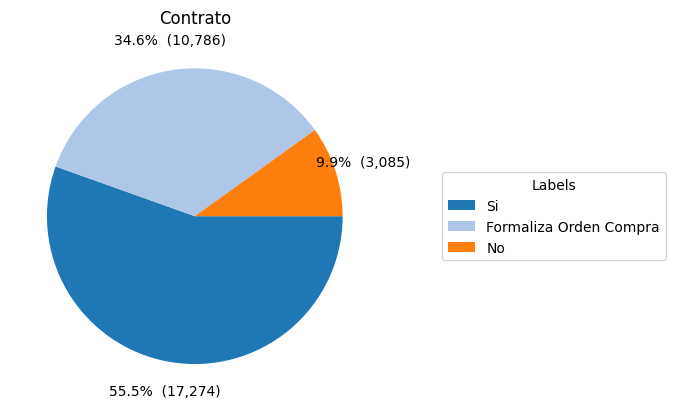

In [51]:
var = "Contrato"

pie_chart(var, licitaciones, 0)

In [52]:
# group df where Contrato is No

df_temp = licitaciones[licitaciones["Contrato"] == "Formaliza Orden Compra"].copy(deep=True)

# show only NombreLicitacion, CantidadItem, Descripcion, Contrato
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

df_temp = df_temp[["NombreLicitacion", "CantidadItem", "Descripcion", "Contrato"]]

df_temp.head(50)

,NombreLicitacion,CantidadItem,Descripcion,Contrato
6,Contratación suministro bidones agua purificada,1,"Contratación de suministro de bidones de agua purificada, dispensadores y vasos",Formaliza Orden Compra
16,Provisión e instalación Tensoestructuras Patio Pabellón Español - Universidad de Santiago de Chile,1,"Instalación de una nueva tensoestructura, pavimentando el patio cubierto e incluyendo el mobiliario público Solicitud asociada N°35316 CC. 102",Formaliza Orden Compra
20,Instalaciones Equipos de Aire Acondicionado,1,"Instalaciones Equipos de Aire Acondicionado en Dependencias del Departamento de Finanzas y Tesorería - U. de Santiago de Chile. La intervención contempla el suministro, montaje e instalación de equipos de aire acondicionado, y la instalación eléctrica requerida, de acuerdo a especificaciones técnicas adjuntas. Asociada a solicitud de compra 40440 de C.C.38",Formaliza Orden Compra
69,COMPRA IMPRESORAS Y MAQUINAS DE ESCRIBIR BRAILLE,4,"COMPRA Y ENTREGA DE 4 IMPRESORAS Y MAQUINAS DE ESCRIBIR BRAILLE, PARA ESTABLECIMIENTOS PARTICIPANTES DEL PROYECTO TECNOLOGIAS DE ACCESO UNIVERSAL PARA LA EDUCACIÓN",Formaliza Orden Compra
2227,Modernización Cortinas Metálicas,1,Modernizar las cortinas metálicas de la Unidad de Crédito Matucana.,Formaliza Orden Compra
2390,DLA SC 247 TERMÓMETROS Y SONDAS PARA LABORATORIOS,1,"Las presentes bases técnicas tienen como objetivo normar el proceso de licitación pública para la adquisición de termómetros y sondas , que serán utilizados en el Departamento de Laboratios y Estaciones Cuarentenarias y Laboratorios Regionales. MONTO ESTIMADO PRIMERA COMPRA 1.500.000 SE EVALUARA POR CADA UNO DE LOS ITEM",Formaliza Orden Compra
2409,Mantenimiento equipos de aire acondicionado Edificio Matemáticas y Cs. de la Computación - Universidad de Santiago de Chile - Readjudicada en Id 5067-52-R120,1,La intervención contempla el mantenimiento de unidades split y VRF para el edificio de matemáticas y ciencias de la computación. Asociada a solicitud de compra 40951,Formaliza Orden Compra
2444,COMPRA E INSTALACIÓN DE CORTINAS TIPO ROLLER,1,COMPRA E INSTALACIÓN DE CORTINAS ROLLER TRADICIONAL BLACKOUT PARA EDIFICIO BLAS CUEVAS DE LA UNIVERSIDAD DE VALPARAÍSO.,Formaliza Orden Compra
2455,Adquisición químicos para dieta artificial insecto,1,"Las presentes bases técnicas tienen como objetivo regular el proceso de licitación pública para la adquisición de productos químicos para la elaboración de una dieta artificial para mantener y criar insectos, los cuales serán utilizados en el Departamento de Laboratorios y Estaciones Cuarentenarias. Estos insumos son indispensables en la elaboración de la dieta para larvas de la especie antes mencionada, las que se crían artificialmente en el laboratorio como sustrato para la crianza de los parasitoides de esta plaga.",Formaliza Orden Compra
2464,DLA SC169 KIT DE EXTRACCIÓN Y PURIFICACIÓN DE ÁC.,1,"ADQUISICIÓN DE KIT DE EXTRACCIÓN Y PURIFICACIÓN DE ÁCIDOS NUCLEICOS 100 REACCIONES, BAJO MODALIDAD SUMINISTRO POR 36 MESES.",Formaliza Orden Compra


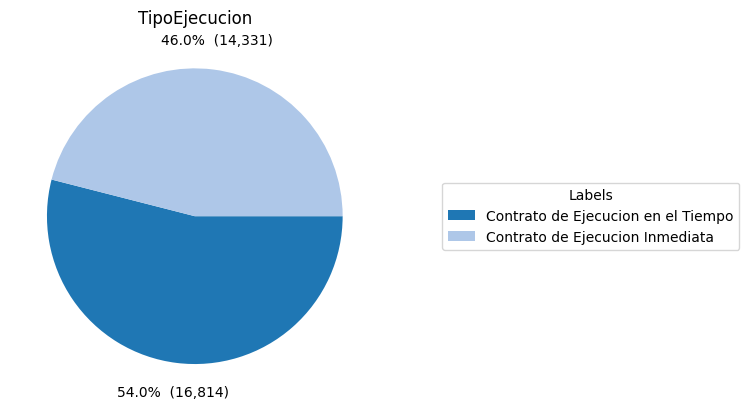

In [53]:
var = "TipoEjecucion"

pie_chart(var, licitaciones, 0)

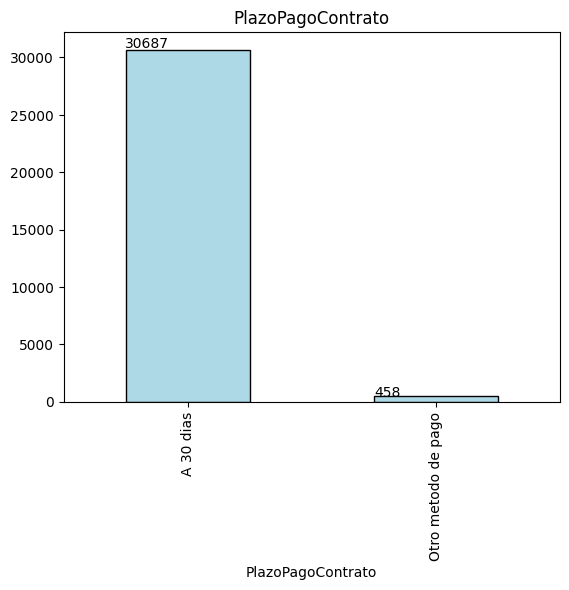

In [54]:
var = "PlazoPagoContrato"

bar_chart(var, licitaciones)

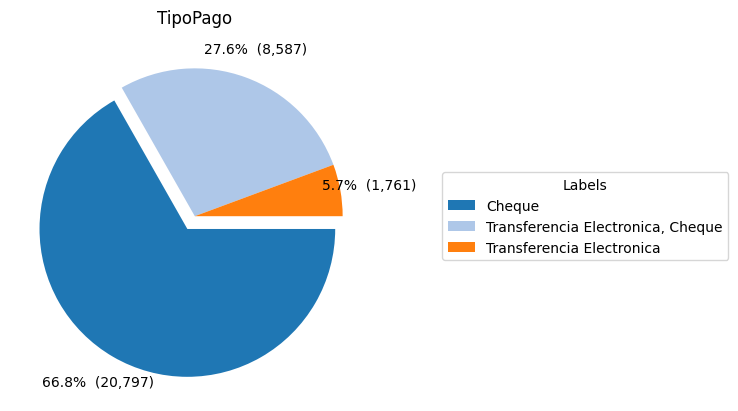

In [55]:
var = "TipoPago"

pie_chart(var, licitaciones,1)

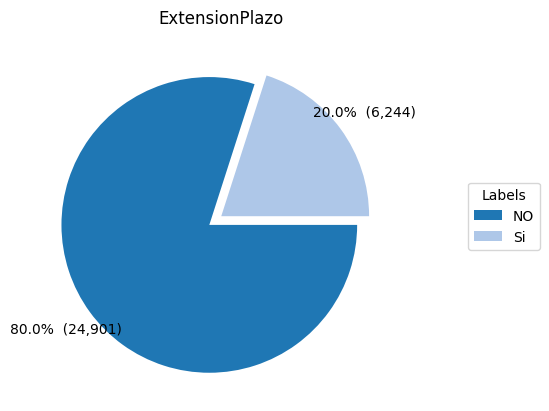

In [56]:
var = "ExtensionPlazo"

pie_chart(var, licitaciones, 1)

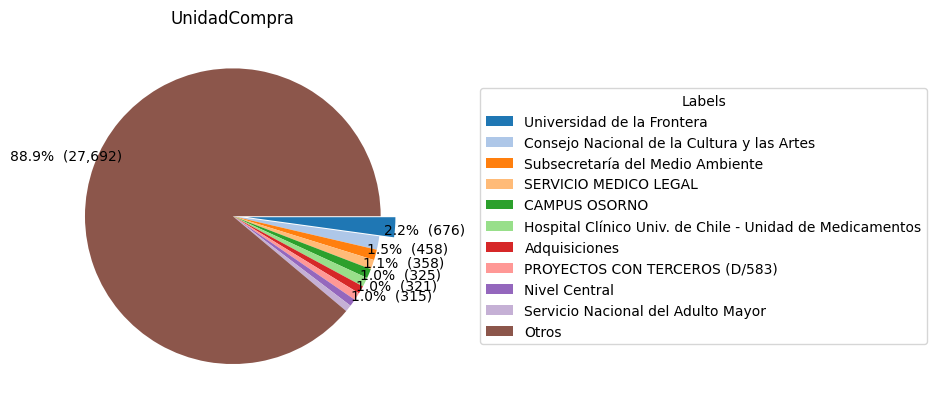

In [57]:
var = "UnidadCompra"

pie_chart(var, licitaciones, 1)

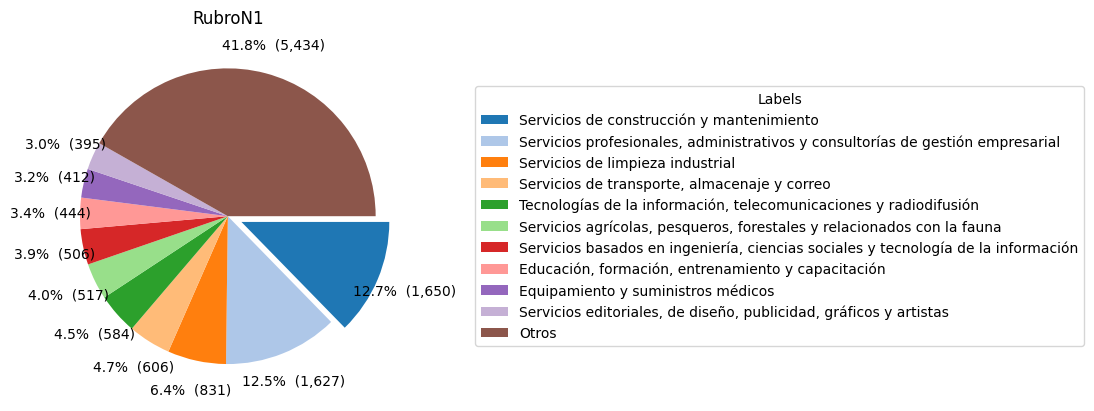

In [58]:
var = "RubroN1"

pie_chart(var, proveedores, 1)

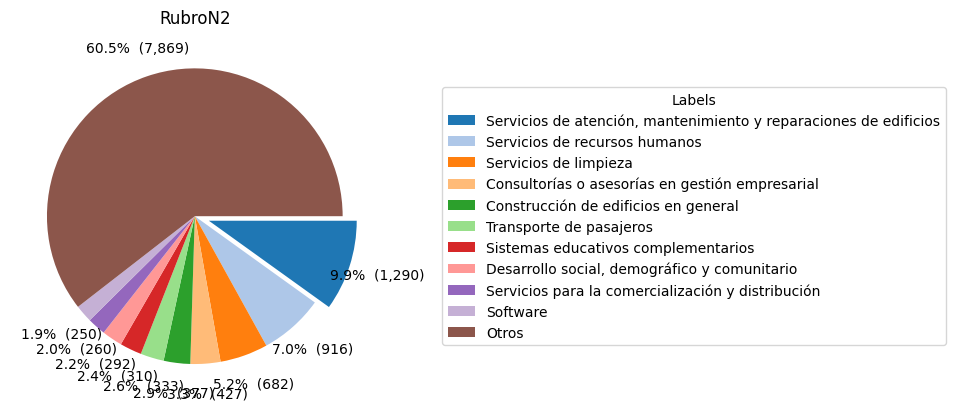

In [59]:
var = "RubroN2"

pie_chart(var, proveedores, 1)

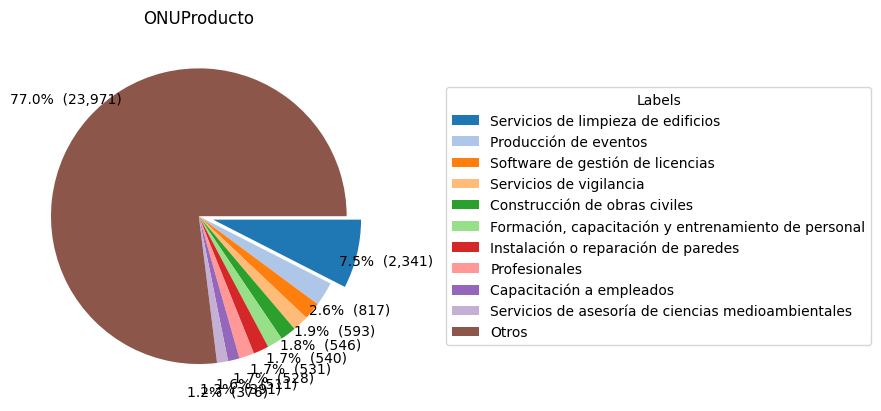

In [60]:
var = "ONUProducto"

pie_chart(var, licitaciones, 1)

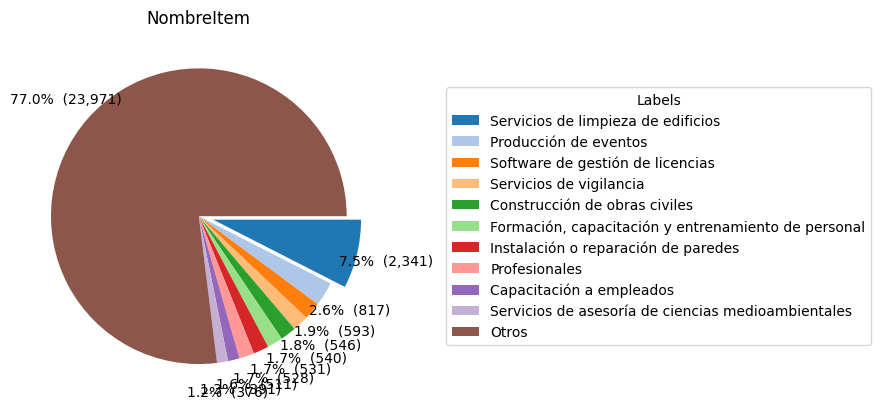

In [61]:
var = "NombreItem"

pie_chart(var, licitaciones, 1)

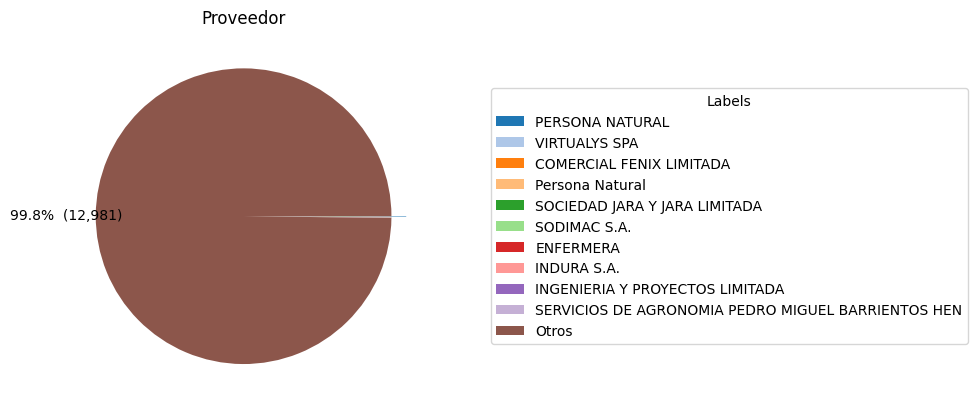

In [62]:
var = "Proveedor"

pie_chart(var, proveedores, 1)

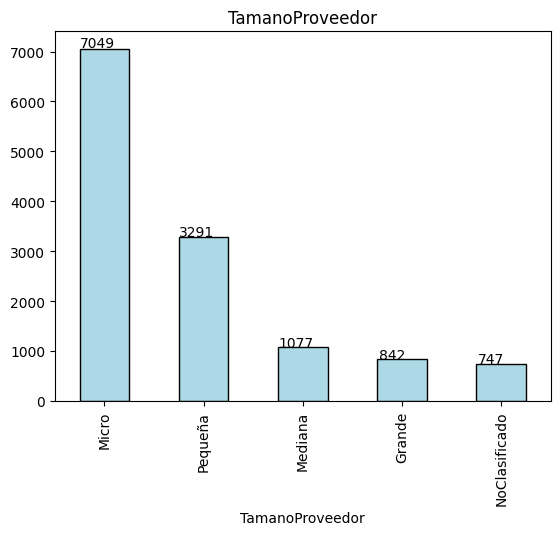

In [63]:
var = "TamanoProveedor" # TODO: group by proveedor, should only mention one proveedor

bar_chart(var, proveedores)

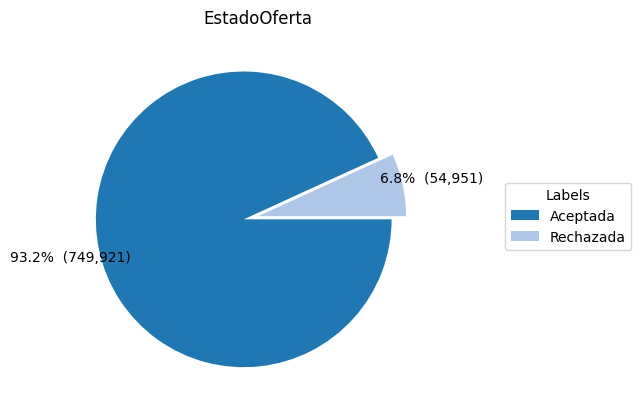

In [64]:
var = "EstadoOferta"

pie_chart(var, df, 1)

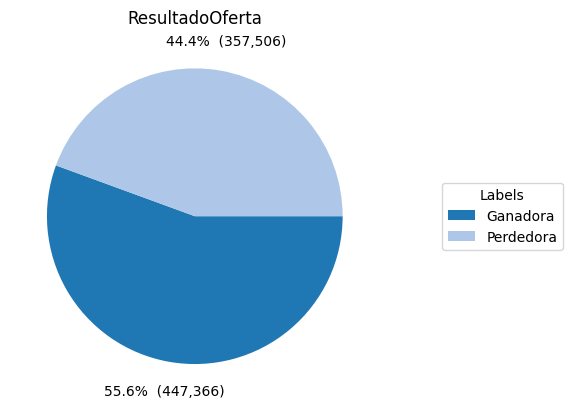

In [65]:
var = "ResultadoOferta" 
# TODO: should first delete EstadoOferta == rechazada, it's assumed that if it isn't accepted, then shouldn't be evaluated as ResultadoOferta

pie_chart(var, df, 0)

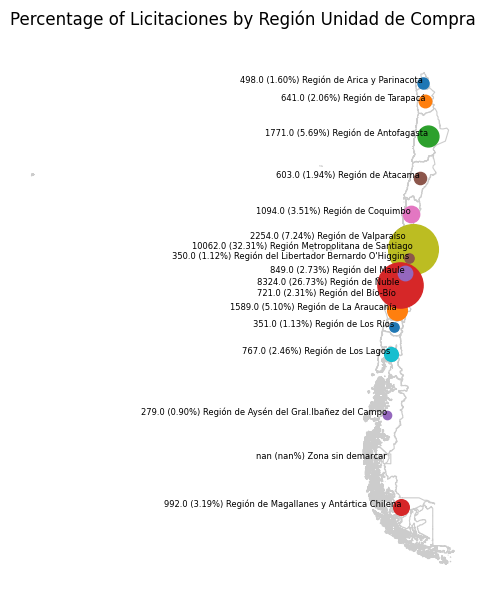

In [66]:
var = "Región Unidad de Compra"

# Load the data
chile_map = gpd.read_file('Regional.shp', encoding='utf-8-sig')
df_temp = licitaciones[var].copy(deep=True).value_counts().reset_index()

region_mapping = {
    'Metropolitana': 'Región Metropolitana de Santiago',
    'Valparaíso': 'Región de Valparaíso',
    'Bío-Bío': 'Región del Bío-Bío',
    'Araucanía': 'Región de La Araucanía',
    'Aysén': 'Región de Aysén del Gral.Ibañez del Campo',
    'Maule': 'Región del Maule',
    'Los Lagos': 'Región de Los Lagos',
    "Lib. Gral. Bdo. O'Higgins": "Región del Libertador Bernardo O'Higgins",
    'Ñuble': 'Región de Ñuble',
    'Coquimbo': 'Región de Coquimbo',
    'Arica y Parinacota': 'Región de Arica y Parinacota',
    'Magallanes y Antártica': 'Región de Magallanes y Antártica Chilena',
    'Tarapacá': 'Región de Tarapacá',
    'Antofagasta': 'Región de Antofagasta',
    'Los Ríos': 'Región de Los Ríos',
    'Atacama': 'Región de Atacama'
}

# Calculate the total count
total_count = df_temp['count'].sum()

# Calculate the percentage for each region
df_temp['percentage'] = df_temp['count'] / total_count * 100

# Use the dictionary to replace the region names in df_temp
df_temp[var] = df_temp[var].map(region_mapping)

# Merge the dataframes
merged = chile_map.set_index('Region').join(df_temp.set_index(var))

# Calculate the centroid of each region
merged['centroid'] = merged.geometry.centroid

# Create a new figure with a larger size
fig, ax = plt.subplots(1, 1, figsize=(6, 30))  # Adjust the size as needed

# Plot the map
merged.boundary.plot(ax=ax, linewidth=0.8, edgecolor='0.8')

# Plot circles at the centroid of each region
for idx, row in merged.iterrows():
    diameter = np.sqrt(row['count']/10 / np.pi) * 2 # scaling factor is set to diameter so the plot is more readable
    #diameter = row['count']/300
    plt.plot(row['centroid'].x, row['centroid'].y, 'o', markersize=diameter) 
    text = f"{row['count']} ({row['percentage']:.2f}%)" + " " + idx
    plt.text(row['centroid'].x, row['centroid'].y, text, horizontalalignment='right', fontsize=6)  # Add the region name to the left of the circle

# Remove the coordinates from the axes
ax.axis('off')

# Add a title
plt.title('Percentage of Licitaciones by Región Unidad de Compra')

plt.show()


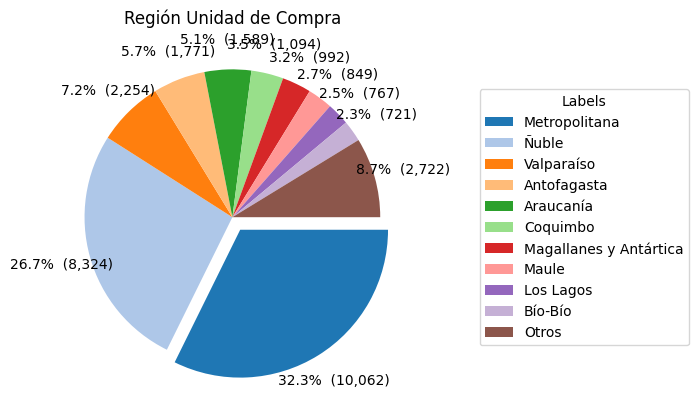

In [67]:
var = "Región Unidad de Compra"

pie_chart(var, licitaciones, 1)

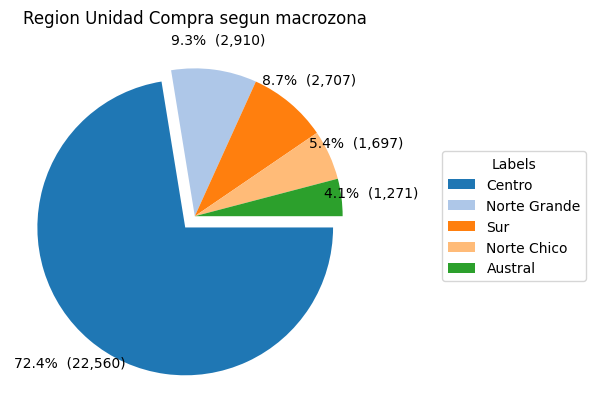

In [68]:
var = "Región Unidad de Compra"
norte_grande = ["Arica y Parinacota", "Tarapacá", "Antofagasta"]
norte_chico = ["Atacama", "Coquimbo"]
centro = ["Valparaíso", "Metropolitana", "Lib. Gral. Bdo. O'Higgins", "Maule", "Bío-Bío", "Ñuble"]
sur = ["Araucanía", "Los Ríos", "Los Lagos"]
austral = ["Magallanes y Antártica", "Aysén"]

df_temp = licitaciones.copy(deep=True)
new_var = "Region Unidad Compra segun macrozona"
df_temp[new_var] = 'Otros'
df_temp.loc[df_temp["Región Unidad de Compra"].isin(norte_grande), new_var] = 'Norte Grande'
df_temp.loc[df_temp["Región Unidad de Compra"].isin(norte_chico), new_var] = 'Norte Chico'
df_temp.loc[df_temp["Región Unidad de Compra"].isin(centro), new_var] = 'Centro'
df_temp.loc[df_temp["Región Unidad de Compra"].isin(sur), new_var] = 'Sur'
df_temp.loc[df_temp["Región Unidad de Compra"].isin(austral), new_var] = 'Austral'

# Group by new_var and count 'Region Unidad de Compra'

pie_chart(new_var, df_temp, 1)

AHORA LAS TABLAS

In [69]:
"""
Table order
var | min | Q1 | med | Q3 | max | arithmetic mean | standard deviation | mode | skewness | kurtosis | % null values | N° null values | N° values
"""

def get_descriptive_statistics_numeric(df, var):
    # Calculate the descriptive statistics
    min_value = df[var].min()
    Q1 = df[var].quantile(0.25)
    median = df[var].median()
    Q3 = df[var].quantile(0.75)
    max_value = df[var].max()
    mean = df[var].mean()
    std = df[var].std()
    mode = df[var].mode().iloc[0]
    skewness = df[var].skew()
    kurtosis = df[var].kurtosis()
    null_values = df[var].isnull().sum()
    total_values = df[var].count()

    return pd.Series([min_value, Q1, median, Q3, max_value, mean, std, mode, skewness, kurtosis, null_values/total_values*100, null_values, total_values],
                     index=['min', 'Q1', 'mediana', 'Q3', 'max', 'promedio', 'desviacion estandar', 'moda', 'skewness', 'kurtosis', '% nulos', 'N° valores nulos', 'N° valores'])

# use the function to get the descriptive statistics for each numeric variable

var_cuantitativa = ["MontoEstimadoLicitacion", "FechaPublicacion", "FechaInicioPreguntas", "FechaFinalPreguntas", "FechaPublicacionRespuestas",
                    "FechaActoAperturaTecnica", "FechaActoAperturaEconomica", "FechaCierre", "FechaAdjudicacion", "FechaActaAprobacion", 
                    "TiempoDuracionContrato", "ValorTiempoRenovacion", "CantidadItem", "CantidadOferta"]

var_num = ["MontoEstimadoLicitacion", "ValorTiempoRenovacion","CantidadItem", "CantidadOferta"]
var_fecha = ["FechaPublicacion", "FechaInicioPreguntas", "FechaFinalPreguntas", "FechaPublicacionRespuestas", "FechaActoAperturaTecnica", 
             "FechaActoAperturaEconomica", "FechaCierre", "FechaAdjudicacion", "FechaActaAprobacion"]


# using the function to get the descriptive statistics for each numeric variable
df_descriptive = pd.DataFrame()

df_temp = licitaciones.copy(deep=True)
#print df_temp null values

# TiempoDuracionContrato is a numeric value but attached to UnidadTiempoDuracionContrato which is it's unit of measure, so we will filter it
sub_valores = df_temp["UnidadTiempoDuracionContrato"].unique()

sub_var_num = []

df_temp_sub = pd.DataFrame()

for sub_valor in sub_valores:
    # new column 
    print(sub_valor)
    text = "TiempoDuracionContrato por " + sub_valor
    #Esto estaba comentado |||
    df_temp.loc[df_temp["UnidadTiempoDuracionContrato"] == sub_valor, text] = df_temp["TiempoDuracionContrato"][df_temp["UnidadTiempoDuracionContrato"] == sub_valor]
    
    df_temp_sub = df_temp[df_temp["UnidadTiempoDuracionContrato"] == sub_valor]
    print(df_temp_sub["TiempoDuracionContrato"].isnull().sum())

    sub_var_num.append(text)


for var in var_num:
    # convert to float, not int

    df_temp[var] = pd.to_numeric(df_temp[var], errors='raise')
    # print null values
    df_descriptive[var] = get_descriptive_statistics_numeric(df_temp, var)

for var in sub_var_num:
    # convert to float, not int
    df_temp_sub[var] = pd.to_numeric(df_temp_sub[var], errors='raise')
    # print null values
    df_descriptive[var] = get_descriptive_statistics_numeric(df_temp, var)

df_descriptive = df_descriptive.T

df_descriptive.head(20)

Meses
0
Horas
0
Dias
0
Semanas
0


C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_22644\533525309.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sub[var] = pd.to_numeric(df_temp_sub[var], errors='raise')
C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_22644\533525309.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sub[var] = pd.to_numeric(df_temp_sub[var], errors='raise')
C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_22644\533525309.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,min,Q1,mediana,Q3,max,promedio,desviacion estandar,moda,skewness,kurtosis,% nulos,N° valores nulos,N° valores
MontoEstimadoLicitacion,100.0,5042000.0,10500000.0,22142270.0,52438300.0,1.504852e+07,1.339534e+07,20000000.0,1.026750,0.145241,0.000000,0.0,31145.0
ValorTiempoRenovacion,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.0,31145.0
CantidadItem,1.0,1.0,1.0,1.0,5400000.0,1.107649e+03,4.020506e+04,1.0,92.569360,11078.695421,0.000000,0.0,31145.0
CantidadOferta,0.0,1.0,1.0,1.0,5400000.0,1.101955e+03,4.020456e+04,1.0,92.573225,11079.300088,0.000000,0.0,31145.0
TiempoDuracionContrato por Meses,0.0,6.0,12.0,24.0,2024.0,1.680115e+01,3.824795e+01,24.0,46.705933,2437.663620,101.860134,15716.0,15429.0
TiempoDuracionContrato por Horas,0.0,0.0,0.0,0.0,44227650.0,3.319343e+03,3.830849e+05,0.0,115.451287,13328.999841,133.663441,17816.0,13329.0
TiempoDuracionContrato por Dias,0.0,30.0,60.0,100.0,1324.0,8.452344e+01,1.005934e+02,60.0,4.581028,36.550904,1317.614929,28948.0,2197.0
TiempoDuracionContrato por Semanas,0.0,6.0,10.0,18.0,90.0,1.353158e+01,1.183737e+01,10.0,2.336884,9.431421,16292.105263,30955.0,190.0


In [70]:

def get_descriptive_statistics_categorical(df, var):
    # Calculate the descriptive statistics
    total_values = df[var].count()
    unique = df[var].nunique()
    mode = df[var].mode().iloc[0]
    null_values = df[var].isnull().sum()
    null_values_percentage = null_values / total_values * 100
    freq_mode = df[var].value_counts().max()
    percentage_mode = freq_mode / total_values * 100

    return pd.Series([total_values, unique, mode, null_values, null_values_percentage, freq_mode, percentage_mode],
                        index=['N° valores', 'N° valores únicos', 'Moda', 'valores nulos', '% nulos', 'Frecuencia moda', '% Frecuencia moda'])


var_cualitativa = ["RegionProveedor", "NroLicitacion", "NombreLicitacion", "TipoLicitacion", "Descripcion", "MonedaLicitacion", "MontoEstimadoVisible",
                   "UnidadTiempoEvaluacion", "EstadoLicitacion", "ContemplaObrasPublicas", "LicitacionInformada",
                   "TipoAdjudicacion", "TipoAprobacionAdjudicacion", "NumeroActaAprobacion", "TipoConvocatoria", "NroEtapasLicitacion", 
                   "SubContratacion", "PublicidadOfertasTecnicas", "Contrato", "UnidadTiempoDuracionContrato", "TipoEjecucion", "PlazoPagoContrato",
                   "TipoPago", "ExtensionPlazo", "UnidadCompra", "UnidadCompraRUT", "entCode", "RubroN1", "RubroN2",
                   "CodigoProductoONU", "ONUProducto", "NombreItem", "DescripcionItem", "UnidadMedida", "Proveedor", "ProveedorRUT", "ActividadProveedor",
                   "TamanoProveedor", "NombreOferta", "EstadoOferta", "ResultadoOferta", "Institución",
                   "Región Unidad de Compra"]

df_descriptive = pd.DataFrame()
df_temp = df.copy(deep=True)

for var in var_cualitativa:
    df_descriptive[var] = get_descriptive_statistics_categorical(df_temp, var)


df_descriptive = df_descriptive.T

df_descriptive.head(50)



,N° valores,N° valores únicos,Moda,valores nulos,% nulos,Frecuencia moda,% Frecuencia moda
RegionProveedor,804872,16,Metropolitana de Santiago,0,0.0,533194,66.245813
NroLicitacion,804872,31145,4449-3-LE21,0,0.0,17931,2.227808
NombreLicitacion,804872,29804,ADQUISICIÓN DE MATERIAL BIBLIOGRÁFICO PARA EL SNBP,0,0.0,17931,2.227808
TipoLicitacion,804872,10,Licitación Pública Entre 100 y 1000 UTM (LE),0,0.0,690490,85.788796
Descripcion,804872,30363,ADQUISICIÓN DE MATERIAL BIBLIOGRÁFICO PARA EL SISTEMA NACIONAL DE BIBLIOTECAS PUBLICAS,0,0.0,17931,2.227808
MonedaLicitacion,804872,5,CLP,0,0.0,784884,97.516624
MontoEstimadoVisible,804872,2,NO,0,0.0,453738,56.373933
UnidadTiempoEvaluacion,804872,4,Horas,0,0.0,712498,88.523144
EstadoLicitacion,804872,5,Adjudicada,0,0.0,803052,99.773877
ContemplaObrasPublicas,804872,2,NO,0,0.0,803928,99.882714


In [ ]:
var_cualitativa_licitaciones = ["NroLicitacion", "NombreLicitacion", "TipoLicitacion", "Descripcion", "MonedaLicitacion", "MontoEstimadoVisible",
                   "UnidadTiempoEvaluacion", "EstadoLicitacion", "ContemplaObrasPublicas", "LicitacionInformada",
                   "TipoAdjudicacion", "TipoAprobacionAdjudicacion", "NumeroActaAprobacion", "TipoConvocatoria", "NroEtapasLicitacion", 
                   "SubContratacion", "PublicidadOfertasTecnicas", "Contrato", "UnidadTiempoDuracionContrato", "TipoEjecucion", "PlazoPagoContrato",
                   "TipoPago", "ExtensionPlazo", "UnidadCompra", "UnidadCompraRUT", "entCode",
                   "CodigoProductoONU", "ONUProducto", "NombreItem", "DescripcionItem", "UnidadMedida",
                   "NombreOferta", "EstadoOferta", "ResultadoOferta", "Institución", "Región Unidad de Compra"]

df_descriptive_lic = pd.DataFrame()
df_temp_lic = licitaciones.copy(deep=True)

for var in var_cualitativa_licitaciones:
    df_descriptive_lic[var] = get_descriptive_statistics_categorical(df_temp_lic, var)


df_descriptive_lic = df_descriptive_lic.T

df_descriptive_lic.head(20)

In [ ]:
var_cualitativa_proveedores = ["RegionProveedor", "RubroN1", "RubroN2", "TamanoProveedor", "Proveedor", "ProveedorRUT"]

df_descriptive_prov = pd.DataFrame()
df_temp_prov = proveedores

for var in var_cualitativa_proveedores:
    df_descriptive_prov[var] = get_descriptive_statistics_categorical(df_temp_prov, var)

df_descriptive_prov = df_descriptive_prov.T

df_descriptive_prov.head(20)